In [2]:
import Experiments_Module as exp

In [3]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import h5py
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
get_ipython().magic('matplotlib inline')

from pylab import rcParams
rcParams['figure.figsize'] = 14, 12  # делаем картинки крупнее
get_ipython().magic("config InlineBackend.figure_format = 'retina'  # делаем картинки красивее")

pd.options.display.max_rows = 5

font = {'size'   : 16}
matplotlib.rc('font', **font)

## SATTELITE

In [284]:
DF = pd.read_csv("satellite.csv", sep=';', header=None)
train_ans = (DF[36] == 2) | (DF[36] == 4) | (DF[36] == 5)
del DF[36]
DF

DF_test = pd.read_csv("satellite_test.csv", sep=';', header=None)
ans = (DF_test[36] == 2) | (DF_test[36] == 4) | (DF_test[36] == 5)
del DF_test[36]
DF

0    1    2   3   4    5    6   7   8    9  ...   26   27  28   29   30  \
0     92  115  120  94  84  102  106  79  84  102 ...  134  104  88  121  128   
1     84  102  106  79  84  102  102  83  80  102 ...  128  100  84  107  113   
2     84  102  102  83  80  102  102  79  84   94 ...  113   87  84   99  104   
3     80  102  102  79  84   94  102  79  80   94 ...  104   79  84   99  104   
4     84   94  102  79  80   94   98  76  80  102 ...  104   79  84  103  104   
5     80   94   98  76  80  102  102  79  76  102 ...  104   79  79  107  109   
6     76  102  106  83  76  102  106  87  80   98 ...  113   87  79  103  104   
7     76  102  106  87  80   98  106  79  76   94 ...  104   83  79  103  104   
8     76   89   98  76  76   94   98  76  76   98 ...   96   75  75   91   96   
9     76   94   98  76  76   98  102  72  76   94 ...   96   71  79   87   93   
10    76   98  102  72  76   94   90  76  76   89 ...   93   71  79   87   93   
11    72   94   90  72  72   89   94  76  72   89 ...   96   71  75   87   93   
...   ..  ...  ...  ..  ..  ...  ...  ..  ..  ... ...  ...  ...  ..  ...  ...   
4423  64   79   96  81  60   83  100  81  60   83 ...   84   78  63   79   96   
4424  60   83  100  81  60   83   96  85  64   87 ...   96   85  66   91  104   
4425  64   83  104  88  64   79  100  85  56   71 ...  104   85  63   83  100   
4426  56   71   96  85  56   68   91  81  56   64 ...  100   85  63   83  100   
4427  56   64   91  81  53   64   83  78  56   68 ...   96   81  63   83   92   
4428  53   64   83  78  56   68   87  74  60   71 ...   92   74  59   83   96   
4429  60   64  104  99  56   64  108  96  64   71 ...   92   70  63   79  108   
4430  56   64  108  96  64   71  108  96  68   75 ...  108   92  66   83  108   
4431  64   71  108  96  68   75  108  96  71   87 ...  108   96  66   87  104   
4432  68   75  108  96  71   87  108  88  71   91 ...  104   89  63   87  104   
4433  71   87  108  88  71   91  100  81  76   95 ...  104   89  70  100  104   
4434  71   91  100  81  76   95  108  88  80   95 ...  104   85  70   91  104   

       31  32   33   34  35  
0     100  84  107  113  87  
1      87  84   99  104  79  
2      79  84   99  104  79  
3      79  84  103  104  79  
4      79  79  107  109  87  
5      87  79  107  109  87  
6      83  79  103  104  79  
7      79  79   95  100  79  
8      71  79   87   93  71  
9      71  79   87   93  67  
10     67  75   87   96  71  
11     67  71   87   89  67  
...   ...  ..  ...  ...  ..  
4423   85  66   91  104  92  
4424   92  66   87  108  89  
4425   85  66   83  100  85  
4426   81  59   87   96  81  
4427   74  59   83   96  74  
4428   74  59   83   92  74  
4429   92  66   83  108  96  
4430   96  66   87  104  89  
4431   89  63   87  104  89  
4432   89  70  100  104  85  
4433   85  70   91  104  85  
4434   85  63   91  100  81  

[4435 rows x 36 columns]

In [209]:
scal = StandardScaler().fit(DF)
DF = scal.transform(DF)
DF_test = scal.transform(DF_test)
train_ans = train_ans.as_matrix()
ans = ans.as_matrix()

In [ ]:
thr = np.linspace(0, 100, 20)
train_res = []
test_res = []
for t in thr:
    res = exp.Solve(exp.IterativeEnsemble(t, metric="manhattan"), DF, train_ans, DF_test, ans)
    train_res.append(res[0])
    test_res.append(res[1])

plt.plot(thr, train_res)
plt.plot(thr, test_res)

In [213]:
np.savetxt("sattelite iterative experiment.txt", (train_res, test_res))

## THYROID

In [292]:
DF = pd.read_csv("ann-train.csv", sep=' ', header=None)
train_ans = (DF[21] == 1) | (DF[21] == 2)
del DF[22]
del DF[23]
del DF[21]
for i in range(1, 16):
    del DF[i]

DF_test = pd.read_csv("ann-test.csv", sep=' ', header=None)
ans = (DF_test[21] == 1) | (DF_test[21] == 2)
del DF_test[21]
del DF_test[22]
del DF_test[23]
for i in range(1, 16):
    del DF_test[i]
DF

0        16      17     18     19     20
0     0.73  0.00060  0.0150  0.120  0.082  0.146
1     0.24  0.00025  0.0300  0.143  0.133  0.108
2     0.47  0.00190  0.0240  0.102  0.131  0.078
3     0.64  0.00090  0.0170  0.077  0.090  0.085
4     0.23  0.00025  0.0260  0.139  0.090  0.153
5     0.69  0.00025  0.0160  0.086  0.070  0.123
6     0.85  0.00025  0.0230  0.128  0.104  0.121
7     0.48  0.00208  0.0200  0.086  0.078  0.110
8     0.67  0.00130  0.0240  0.087  0.109  0.080
9     0.76  0.00010  0.0290  0.124  0.128  0.097
10    0.62  0.01100  0.0080  0.073  0.074  0.098
11    0.18  0.00010  0.0230  0.098  0.085  0.115
...    ...      ...     ...    ...    ...    ...
3760  0.37  0.00208  0.0240  0.177  0.146  0.122
3761  0.26  0.00008  0.0170  0.174  0.123  0.142
3762  0.30  0.00008  0.0190  0.147  0.103  0.143
3763  0.50  0.00330  0.0208  0.107  0.107  0.100
3764  0.59  0.00001  0.0200  0.113  0.086  0.131
3765  0.72  0.00500  0.0206  0.101  0.088  0.115
3766  0.65  0.00047  0.0080  0.154  0.075  0.204
3767  0.77  0.00006  0.0206  0.125  0.107  0.117
3768  0.41  0.00130  0.0250  0.125  0.114  0.109
3769  0.88  0.01300  0.0174  0.123  0.099  0.124
3770  0.64  0.00078  0.0206  0.106  0.088  0.121
3771  0.46  0.00189  0.0206  0.093  0.091  0.102

[3772 rows x 6 columns]

In [215]:
scal = StandardScaler().fit(DF)
DF = scal.transform(DF)
DF_test = scal.transform(DF_test)
train_ans = train_ans.as_matrix()
ans = ans.as_matrix()

In [ ]:
thr = np.linspace(0, 100, 20)[:-1]
train_res = []
test_res = []
for t in thr:
    res = exp.Solve(exp.IterativeEnsemble(t, metric="manhattan"), DF, train_ans, DF_test, ans)
    train_res.append(res[0])
    test_res.append(res[1])
    print(t, ':', res)

plt.plot(thr, train_res)
plt.plot(thr, test_res)

In [217]:
np.savetxt("thyroid iterative experiment.txt", (train_res, test_res))

# SHUTTLE

Набір даних NASA за 9 матеріальними визнаннями визначає, якою є характеристика самої шаттла, це його фотографії (опис даних наборів складено так, щоб користувачі про такі речі не думали о\_О).

Вихідна задача - завдання класифікації, всього класів 7, однак доля 1-го класу становить 80%. В статті по IsolationForest, похоже, сжульнічали: чому-то не вважали аномаліями 4-й клас.

In [296]:
DF = pd.read_csv("shuttle.txt", sep=' ', header=None)
train_ans = (DF[9] == 2) | (DF[9] == 3) | (DF[9] == 5) | (DF[9] == 6) | (DF[9] == 7)
del DF[9]

DF_test = pd.read_csv("shuttle_test.txt", sep=' ', header=None)
ans = (DF_test[9] == 2) | (DF_test[9] == 3) | (DF_test[9] == 5) | (DF_test[9] == 6) | (DF_test[9] == 7)
del DF_test[9]

DF

0   1    2  3   4   5   6   7   8
0       50  21   77  0  28   0  27  48  22
1       55   0   92  0   0  26  36  92  56
2       53   0   82  0  52  -5  29  30   2
3       37   0   76  0  28  18  40  48   8
4       37   0   79  0  34 -26  43  46   2
5       85   0   88 -4   6   1   3  83  80
6       56   0   81  0  -4  11  25  86  62
7       55  -1   95 -3  54  -4  40  41   2
8       53   8   77  0  28   0  23  48  24
9       37   0  101 -7  28   0  64  73   8
10      37   0   78 -2  12   0  42  65  24
11      45   0   84  0  46  20  38  37   0
...    ...  ..  ... ..  ..  ..  ..  ..  ..
43488   37   0   77  0  20   2  40  56  16
43489   56   0   95  0  56   1  40  39   0
43490   45  -5   82  0  44   0  37  38   0
43491   51   0   83  0  50  -7  32  34   2
43492  105  -1  107  0  70   0   1  37  36
43493   37  -1   76  0  38   6  39  37   0
43494   45  -5   90  0  44 -26  45  46   2
43495   46   5   78  0  46   5  32  32   0
43496   37   0   79 -1  10   3  43  69  26
43497   48   0   78  3  46   0  30  32   2
43498   41   0   79  0  38 -25  38  40   2
43499   40  -3  100  0  38   0  61  62   2

[43500 rows x 9 columns]

In [297]:
scal = StandardScaler().fit(DF)
DF = scal.transform(DF)
DF_test = scal.transform(DF_test)
train_ans = train_ans.as_matrix()
ans = ans.as_matrix()

In [ ]:
thr = np.linspace(0, 100, 20)[:-1]
train_res = []
test_res = []
for t in thr:
    res = exp.Solve(exp.IterativeEnsemble(t, metric="manhattan", estimators=100), DF, train_ans, DF_test, ans)
    train_res.append(res[0])
    test_res.append(res[1])
    print(t, ':', res)

plt.plot(thr, train_res)
plt.plot(thr, test_res)

In [222]:
np.savetxt("shuttle iterative experiment.txt", (train_res, test_res))

In [299]:
ans.sum() / len(ans) * 100

5.9793103448275859

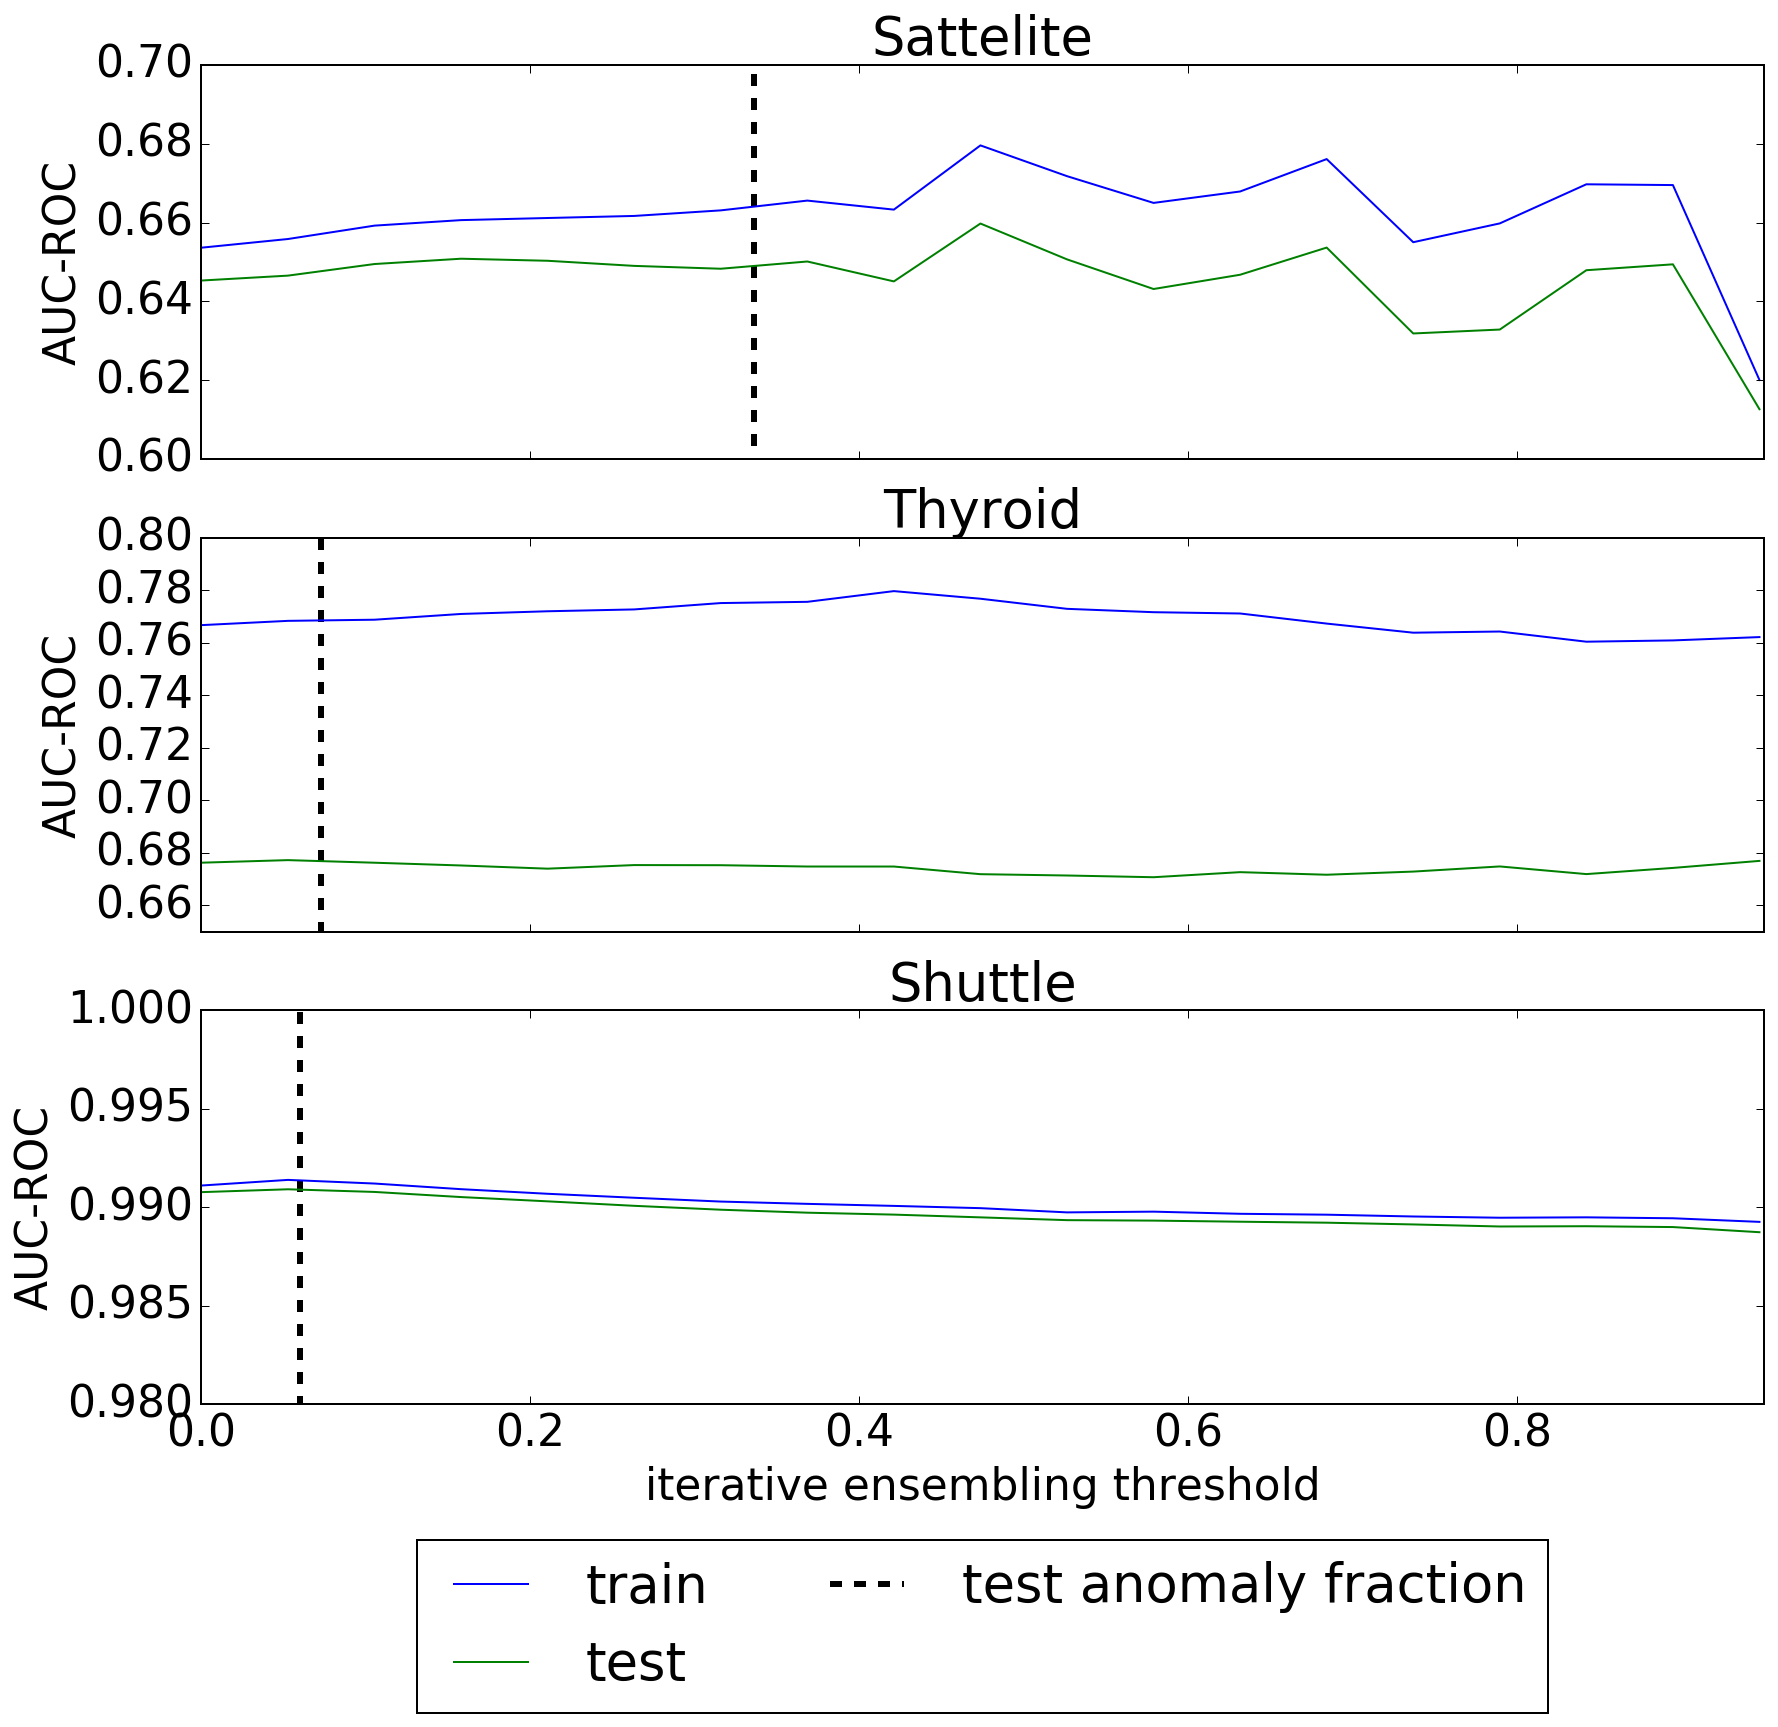

In [358]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

thr = np.linspace(0, 1, 20)[:-1]
train_res, test_res = np.loadtxt("sattelite iterative experiment.txt")

ax1.set_title("Sattelite")
#ax1.set_xlabel('iterative ensembling threshold')
ax1.set_ylabel('AUC-ROC')
ax1.set_xlim(0, 0.95)
ax1.set_ylim(0.6, 0.7)
ax1.plot(thr, train_res, label="train")
ax1.plot(thr, test_res, label="test")
ax1.vlines(x=0.336, ymin=0, ymax=1, linestyles='dashed', label='test anomaly fraction', linewidth=3)

train_res, test_res = np.loadtxt("thyroid iterative experiment.txt")

ax2.set_title("Thyroid")
ax2.set_ylabel('AUC-ROC')
ax2.set_xlim(0, 0.95)
ax2.set_ylim(0.65, 0.8)
ax2.plot(thr, train_res, label="train")
ax2.plot(thr, test_res, label="test")
ax2.vlines(x=0.0729, ymin=0, ymax=1, linestyles='dashed', label='test anomaly fraction', linewidth=3)

train_res, test_res = np.loadtxt("shuttle iterative experiment.txt")

ax3.set_title("Shuttle")
ax3.set_xlabel('iterative ensembling threshold')
ax3.set_ylabel('AUC-ROC')
ax3.set_xlim(0, 0.95)
ax3.set_ylim(0.98, 1)
ax3.plot(thr, train_res, label="train")
ax3.plot(thr, test_res, label="test")
ax3.vlines(x=0.0598, ymin=0, ymax=1, linestyles='dashed', label='test anomaly fraction', linewidth=3)

handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles, labels, bbox_to_anchor=(0.5, -0.85), loc='lower center', ncol=2)

# SMTP

In [4]:
f = h5py.File('smtp.mat')
test = {}
for k, v in f.items():
    test[k] = np.array(v)
DF = pd.DataFrame(test['X'].T)
DF['y'] = test['y'][0]
DF = shuffle(DF)

ans = DF['y'].astype(bool)
del DF['y']

DF

0         1         2
46590 -2.302585  6.862863  5.805436
54511  0.095310  8.198942  5.799396
...         ...       ...       ...
56544 -2.302585  6.519295  5.802420
5660  -2.302585  7.367140  6.190520

[95156 rows x 3 columns]

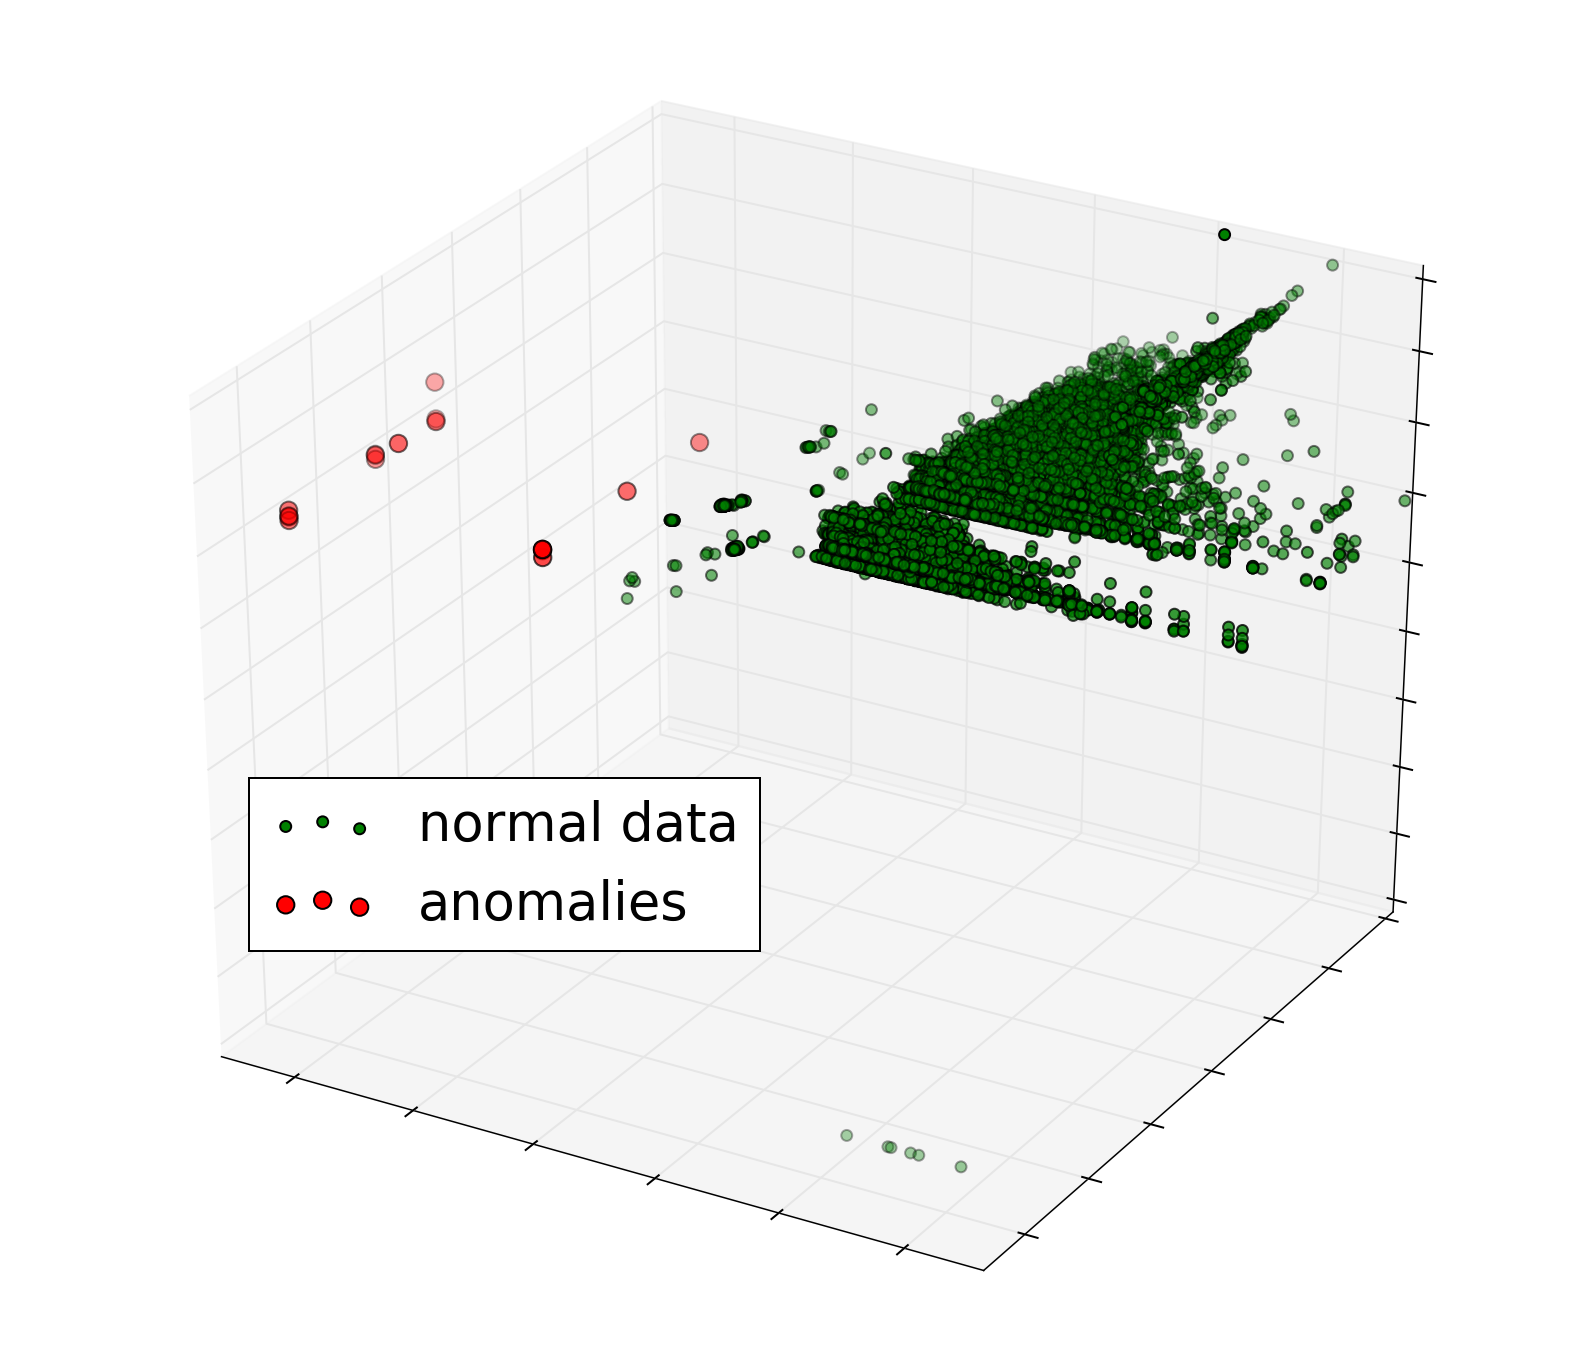

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import pltes3D

font = {'size'   : 22}
matplotlib.rc('font', **font)

fig = plt.figure()
plt = fig.add_subplot(111, projection='3d')

normals = DF[~ans]
anomals = DF[ans]
plt.scatter(normals[1], normals[0], normals[2], s=30, c='g', label="normal data")
plt.scatter(anomals[1], anomals[0], anomals[2], s=75, c='r', label='anomalies')
plt.set_xticklabels([])
plt.set_xlim(-3, 9)
plt.set_yticklabels([])
plt.set_ylim(-3, 10)
plt.set_zticklabels([])
plt.set_zlim(-3, 6)
plt.margins(0)
plt.legend(loc=(0.15, 0.3))
plt.show()

# Probabilistic Model

In [33]:
rnd = np.random.RandomState(seed=317)
K1 = 0.03 * rnd.normal(size=(200, 2)) + 0.1
K2 = 0.08 * rnd.normal(size=(200, 2)) + 0.5
normals = np.vstack([K1, K2])
noise = rnd.uniform(0, 1, size=(20, 2))
anomalies = 0.005 * rnd.normal(size=(20, 2)) + 0.1
anomalies[:, 1] += 0.7

DF = np.vstack([normals, noise, anomalies])
pd.DataFrame(DF).to_csv("model_data.csv")

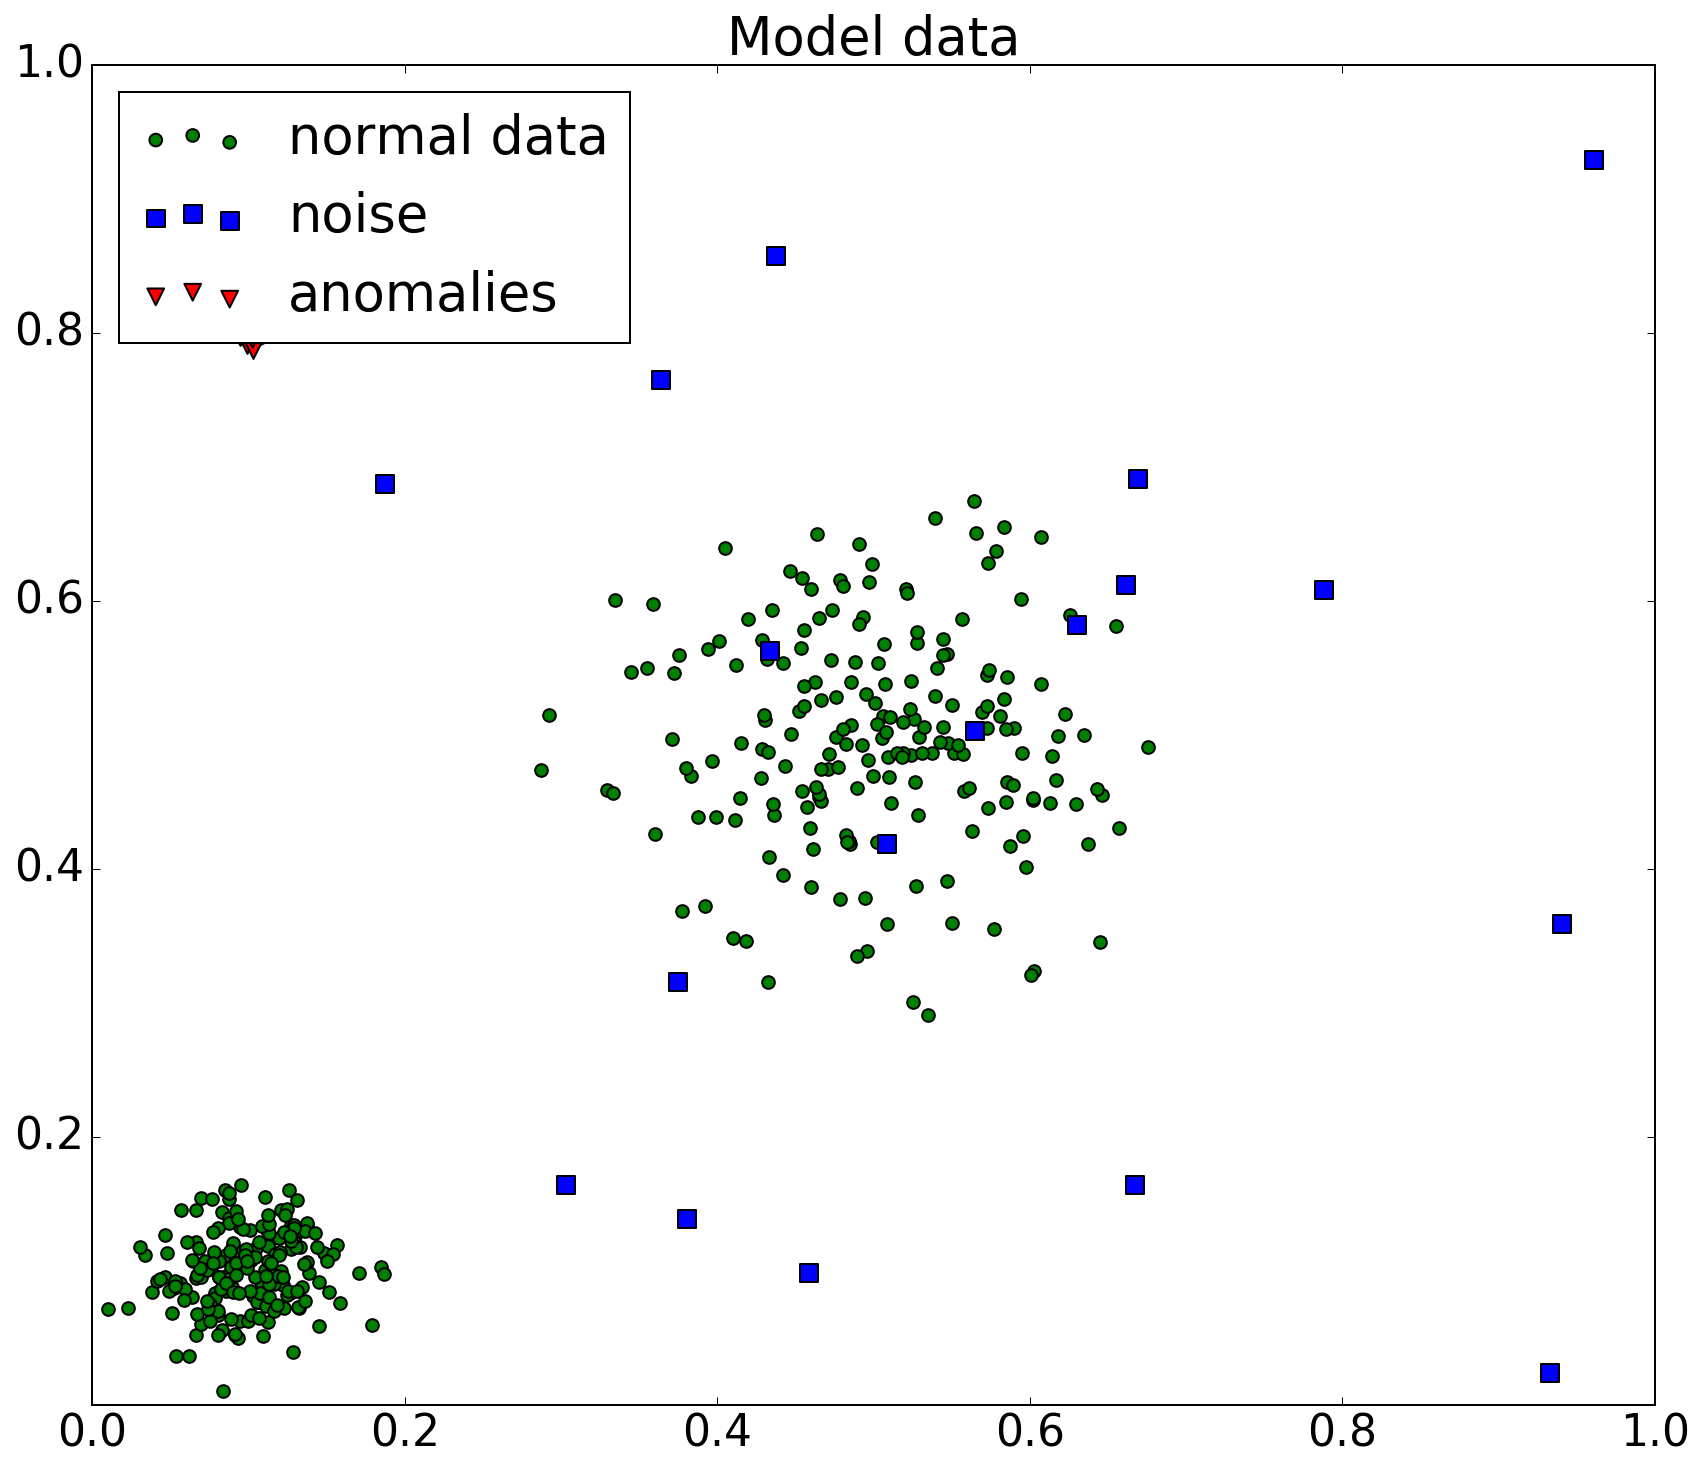

In [34]:
plt.scatter(normals[:, 0], normals[:, 1], c='g', s=40, label="normal data")
plt.scatter(noise[:, 0], noise[:, 1], c='b', marker='s', s=80, label="noise")
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='r', marker='v', s=70, label="anomalies")
plt.xlim(0, 1)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0])
plt.ylim(0, 1)
plt.legend(loc=2)
plt.title("Model data")
plt.show()

In [98]:
import itertools
from scipy import linalg
from sklearn import mixture
from matplotlib.patches import Ellipse

def drawEM(ax, gmm, title):
    color_iter = itertools.cycle(['cornflowerblue', 'darkorange'])

    def plot_results(X, Y_, means, covariances, size, m):    
        for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
            v, w = linalg.eigh(covar)
            v = 2. * np.sqrt(2.) * np.sqrt(v)
            u = w[0] / linalg.norm(w[0])

            ax.scatter(X[Y_ == i, 0], X[Y_ == i, 1], size, color=color, marker=m)

            # Построїм еліпс, щоб показати гаусівську складову
            angle = np.arctan(u[1] / u[0])
            angle = 180. * angle / np.pi  # конвертуємо в градуси
            ell = Ellipse(mean, v[0], v[1], 180. + angle, color=color)
            ell.set_clip_box(ax.bbox)
            ell.set_alpha(0.4)
            ax.add_artist(ell)

    plot_results(DF[:400], gmm.predict(DF[:400]), gmm.means_, gmm.covariances_, 40, 'o')
    plot_results(DF[400:420], gmm.predict(DF[400:420]), gmm.means_, gmm.covariances_, 80, 's')
    plot_results(DF[420:440], gmm.predict(DF[420:440]), gmm.means_, gmm.covariances_, 70, 'v')

    ax.set_xlim(0, 1)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_ylim(0, 1)
    ax.set_title(title)

In [179]:
def draw(f, ax, score, title):
    y, x = np.mgrid[slice(0, 1.001, 0.005),
                    slice(0, 1.001, 0.005)]
    z = score(np.array([x.flatten(), y.flatten()]).T).reshape(201, 201)
    
    f.colorbar(ax.pcolor(x, y, z, cmap=plt.cm.RdYlGn))
    ax.scatter(normals[:, 0], normals[:, 1], c='g', s=40, label="normal data")
    ax.scatter(noise[:, 0], noise[:, 1], c='b', marker='s', s=80, label="noise")
    ax.scatter(anomalies[:, 0], anomalies[:, 1], c='r', marker='v', s=70, label="anomalies") 

    ax.set_xlim(0, 1)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_ylim(0, 1)
    ax.set_title(title)
    plt.tight_layout()

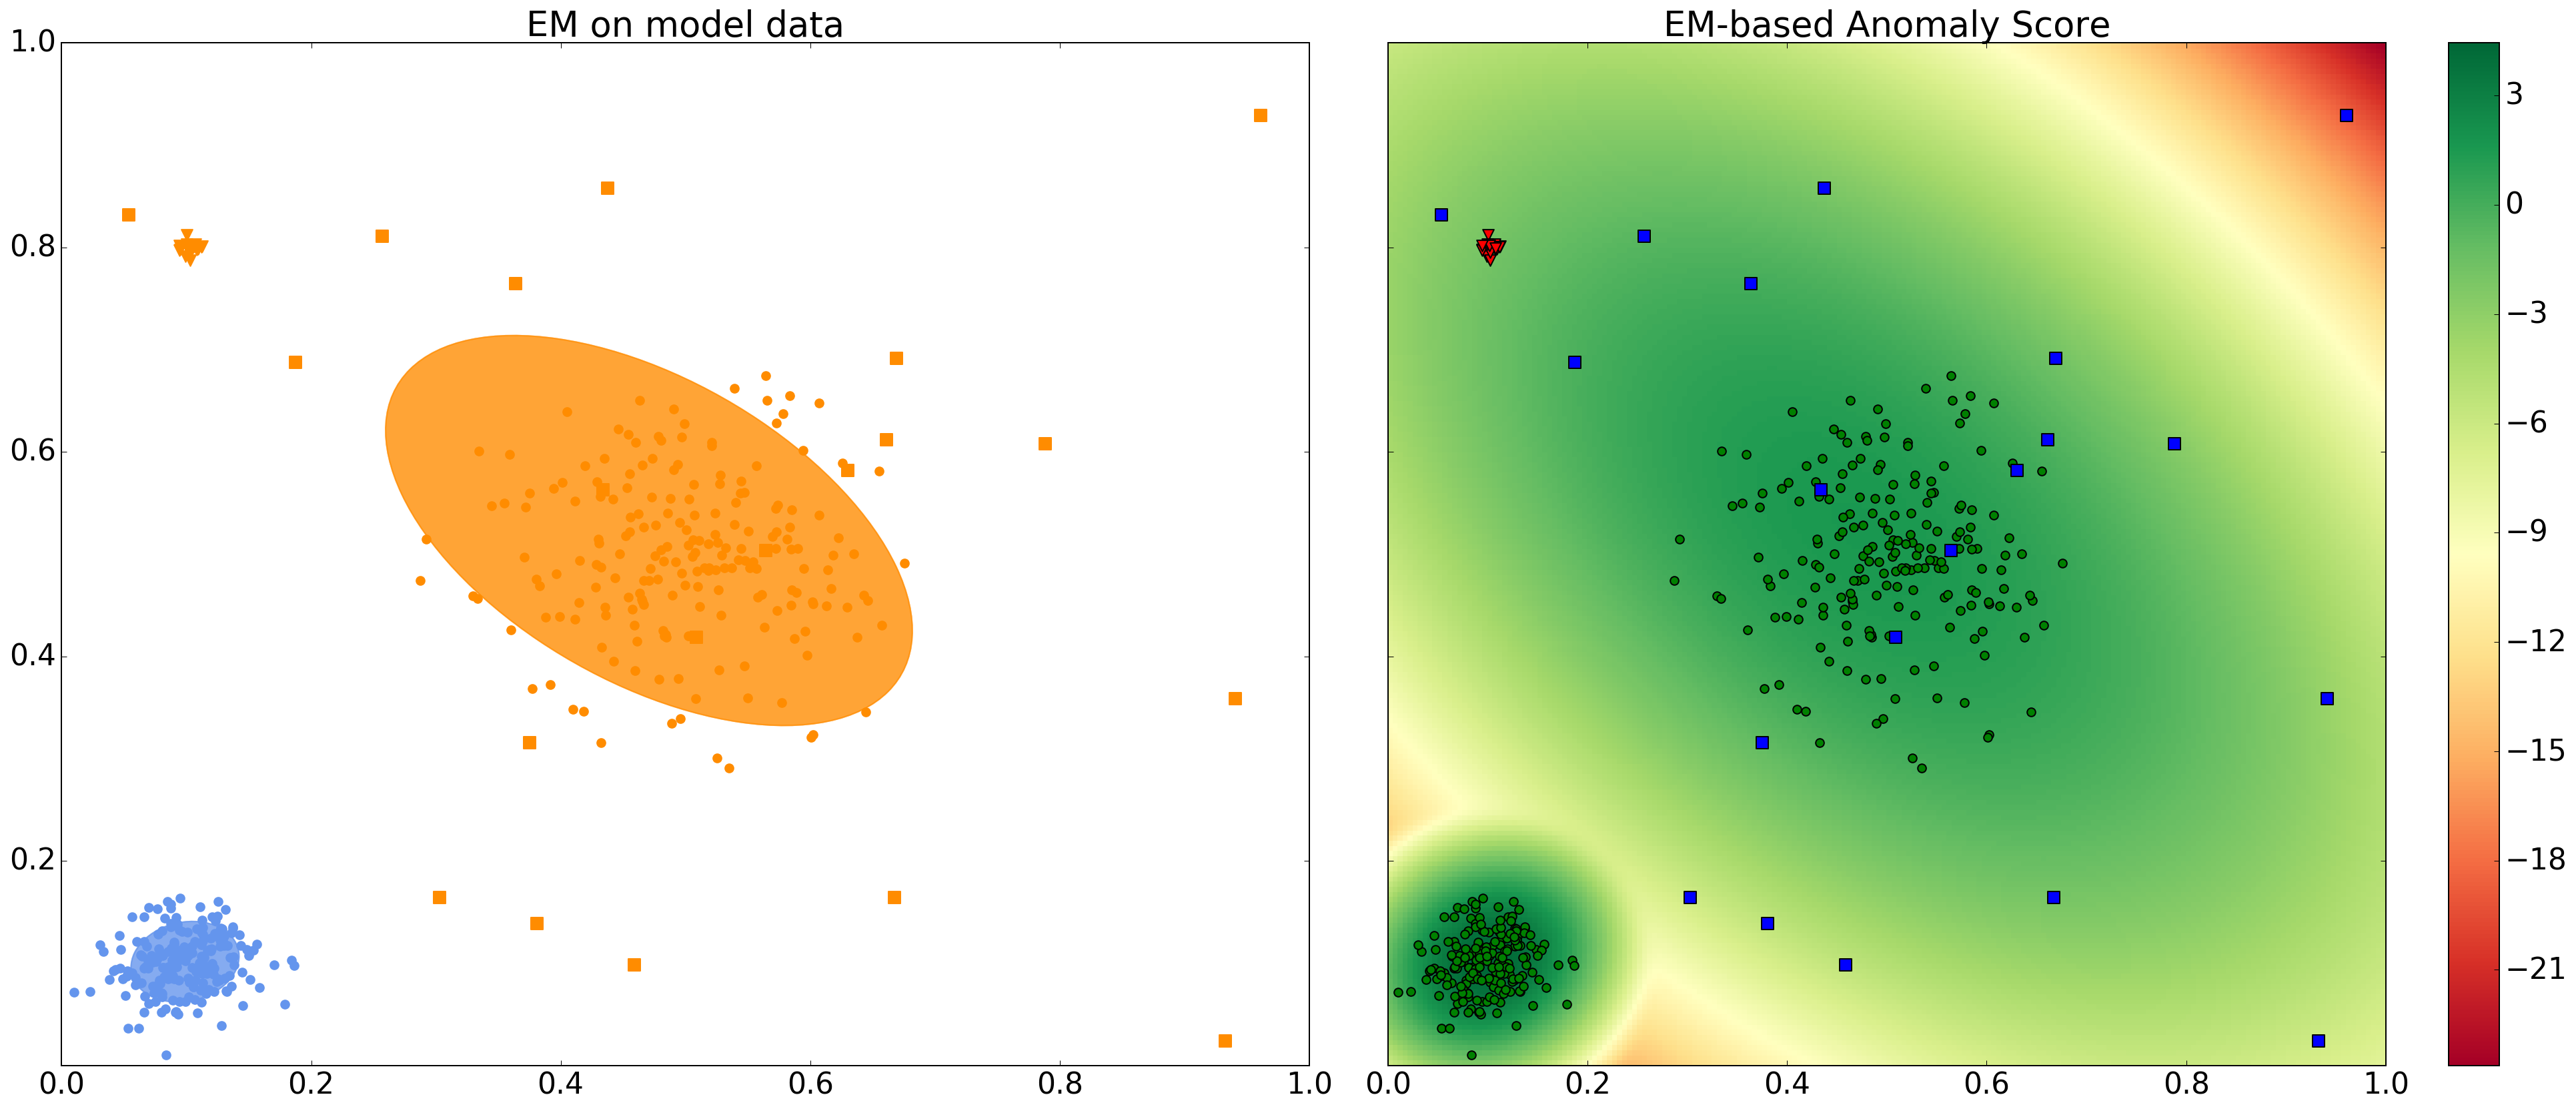

In [103]:
f, (plt1, plt2) = plt.subplots(1, 2, sharey=True)

gmm = mixture.GaussianMixture(n_components=2).fit(DF)
drawEM(plt1, gmm, "EM on model data")
draw(f, plt2, gmm.score_samples, "EM-based Anomaly Score")

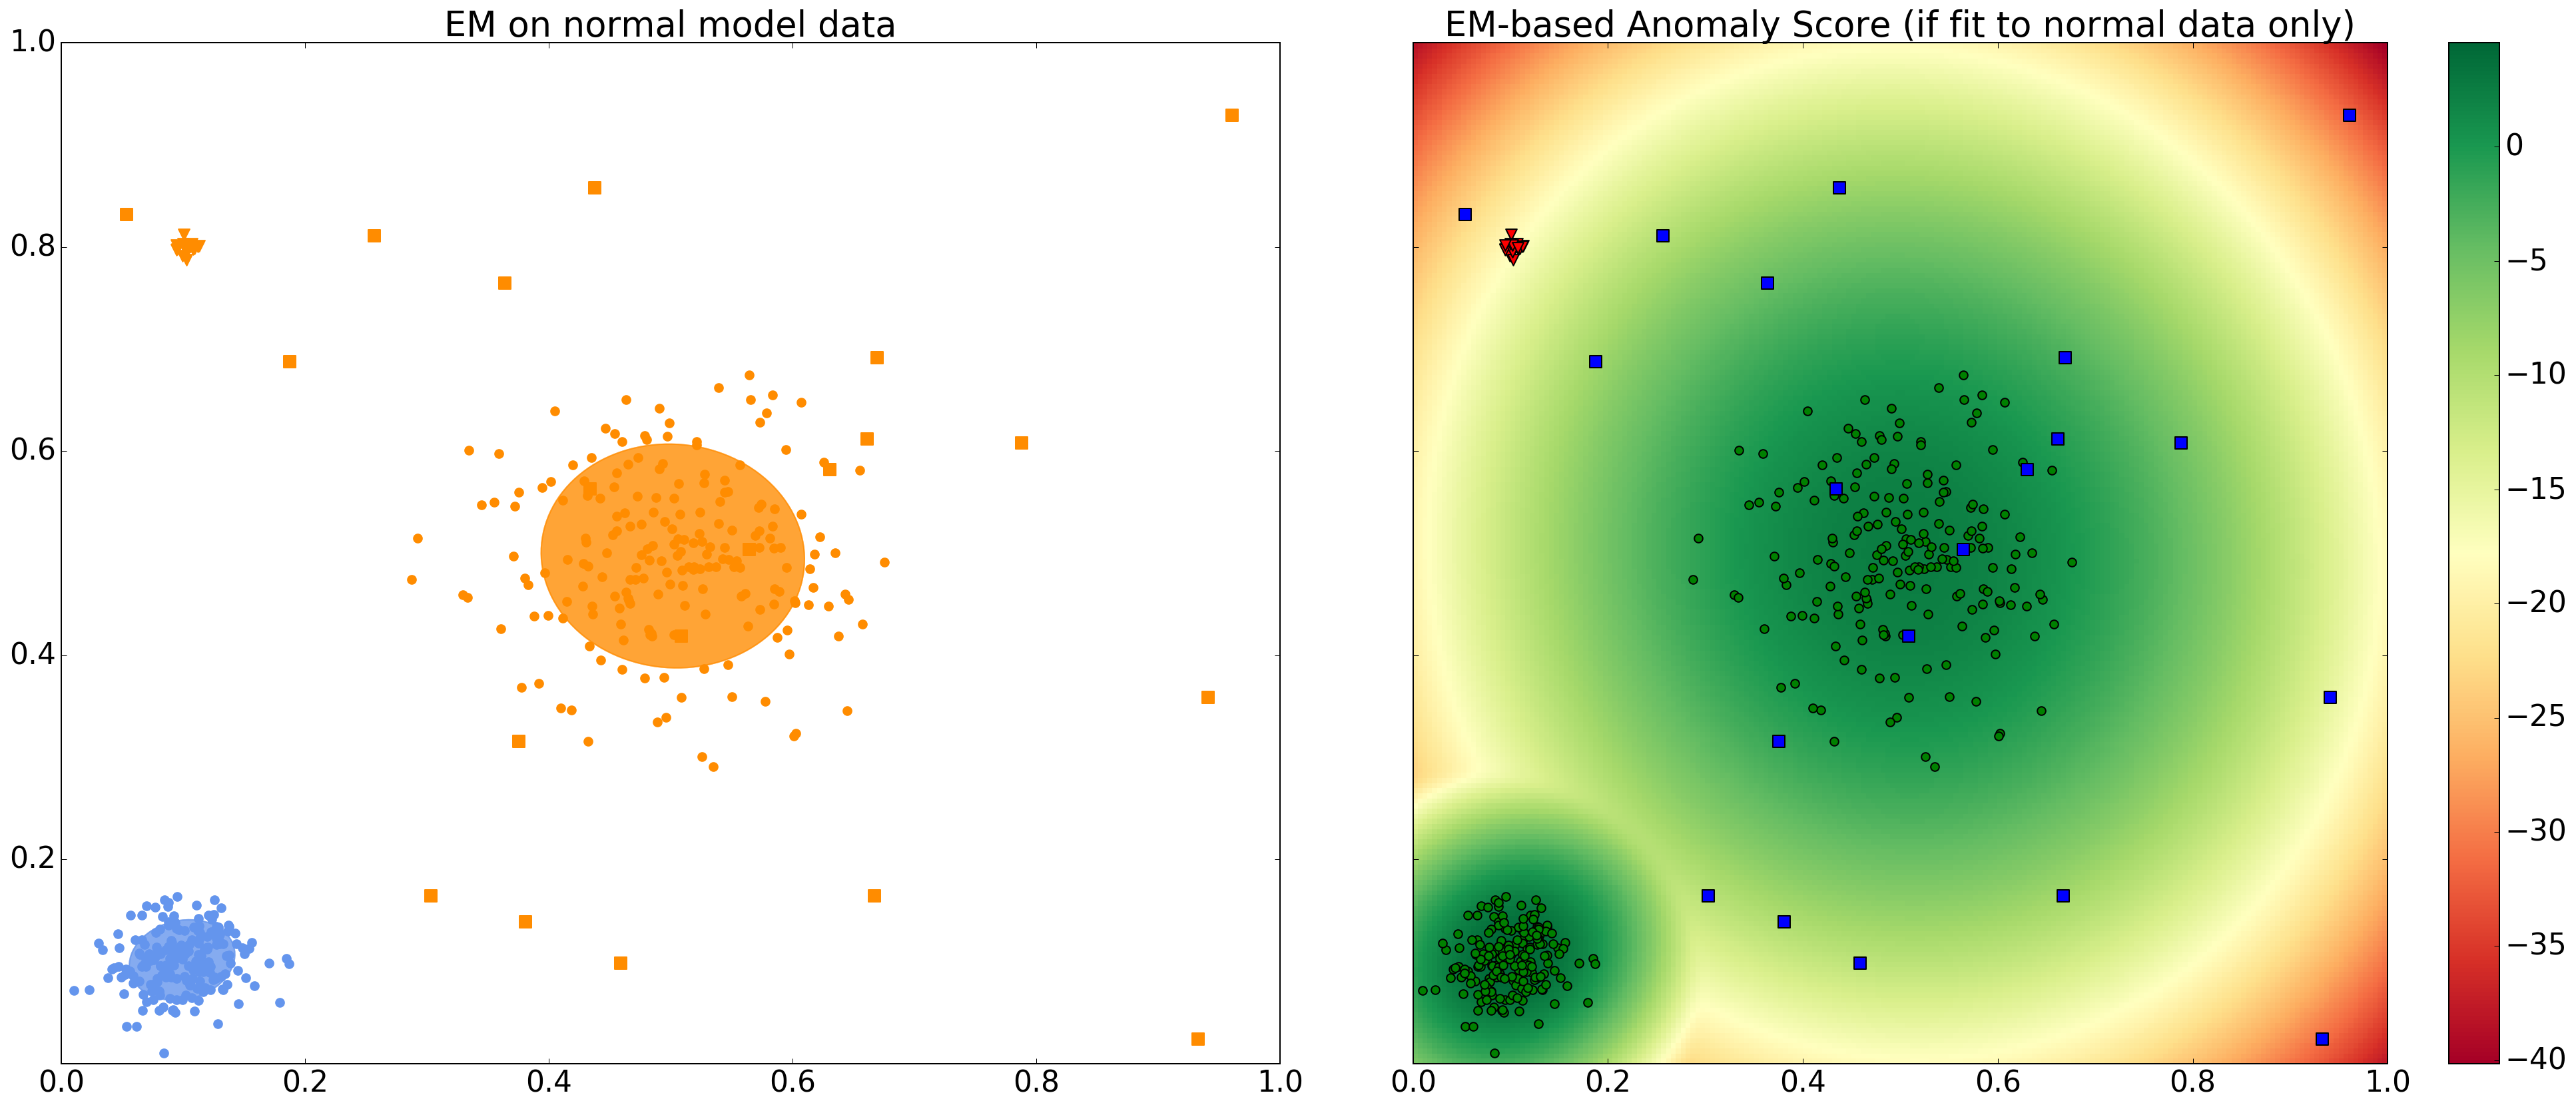

In [104]:
rcParams['figure.figsize'] = 28, 12
f, (plt1, plt2) = plt.subplots(1, 2, sharey=True)

gmm = mixture.GaussianMixture(n_components=2).fit(DF[:400])
drawEM(plt1, gmm, "EM on normal model data")
draw(f, plt2, gmm.score_samples, "EM-based Anomaly Score (if fit to normal data only)")

# Linear Model

In [174]:
rnd = np.random.RandomState(seed=179)
K = 0.1 * rnd.normal(size=(400, 1)) + 0.5
normals = np.hstack([K, K]) + 0.05 * rnd.normal(size=(400, 2))
noise = rnd.uniform(0, 1, size=(20, 2))
anomalies = 0.005 * rnd.normal(size=(20, 2)) + 0.1
anomalies[:, 1] += 0.7

DF = np.vstack([normals, noise, anomalies])
pd.DataFrame(DF).to_csv("linear_model_data.csv")

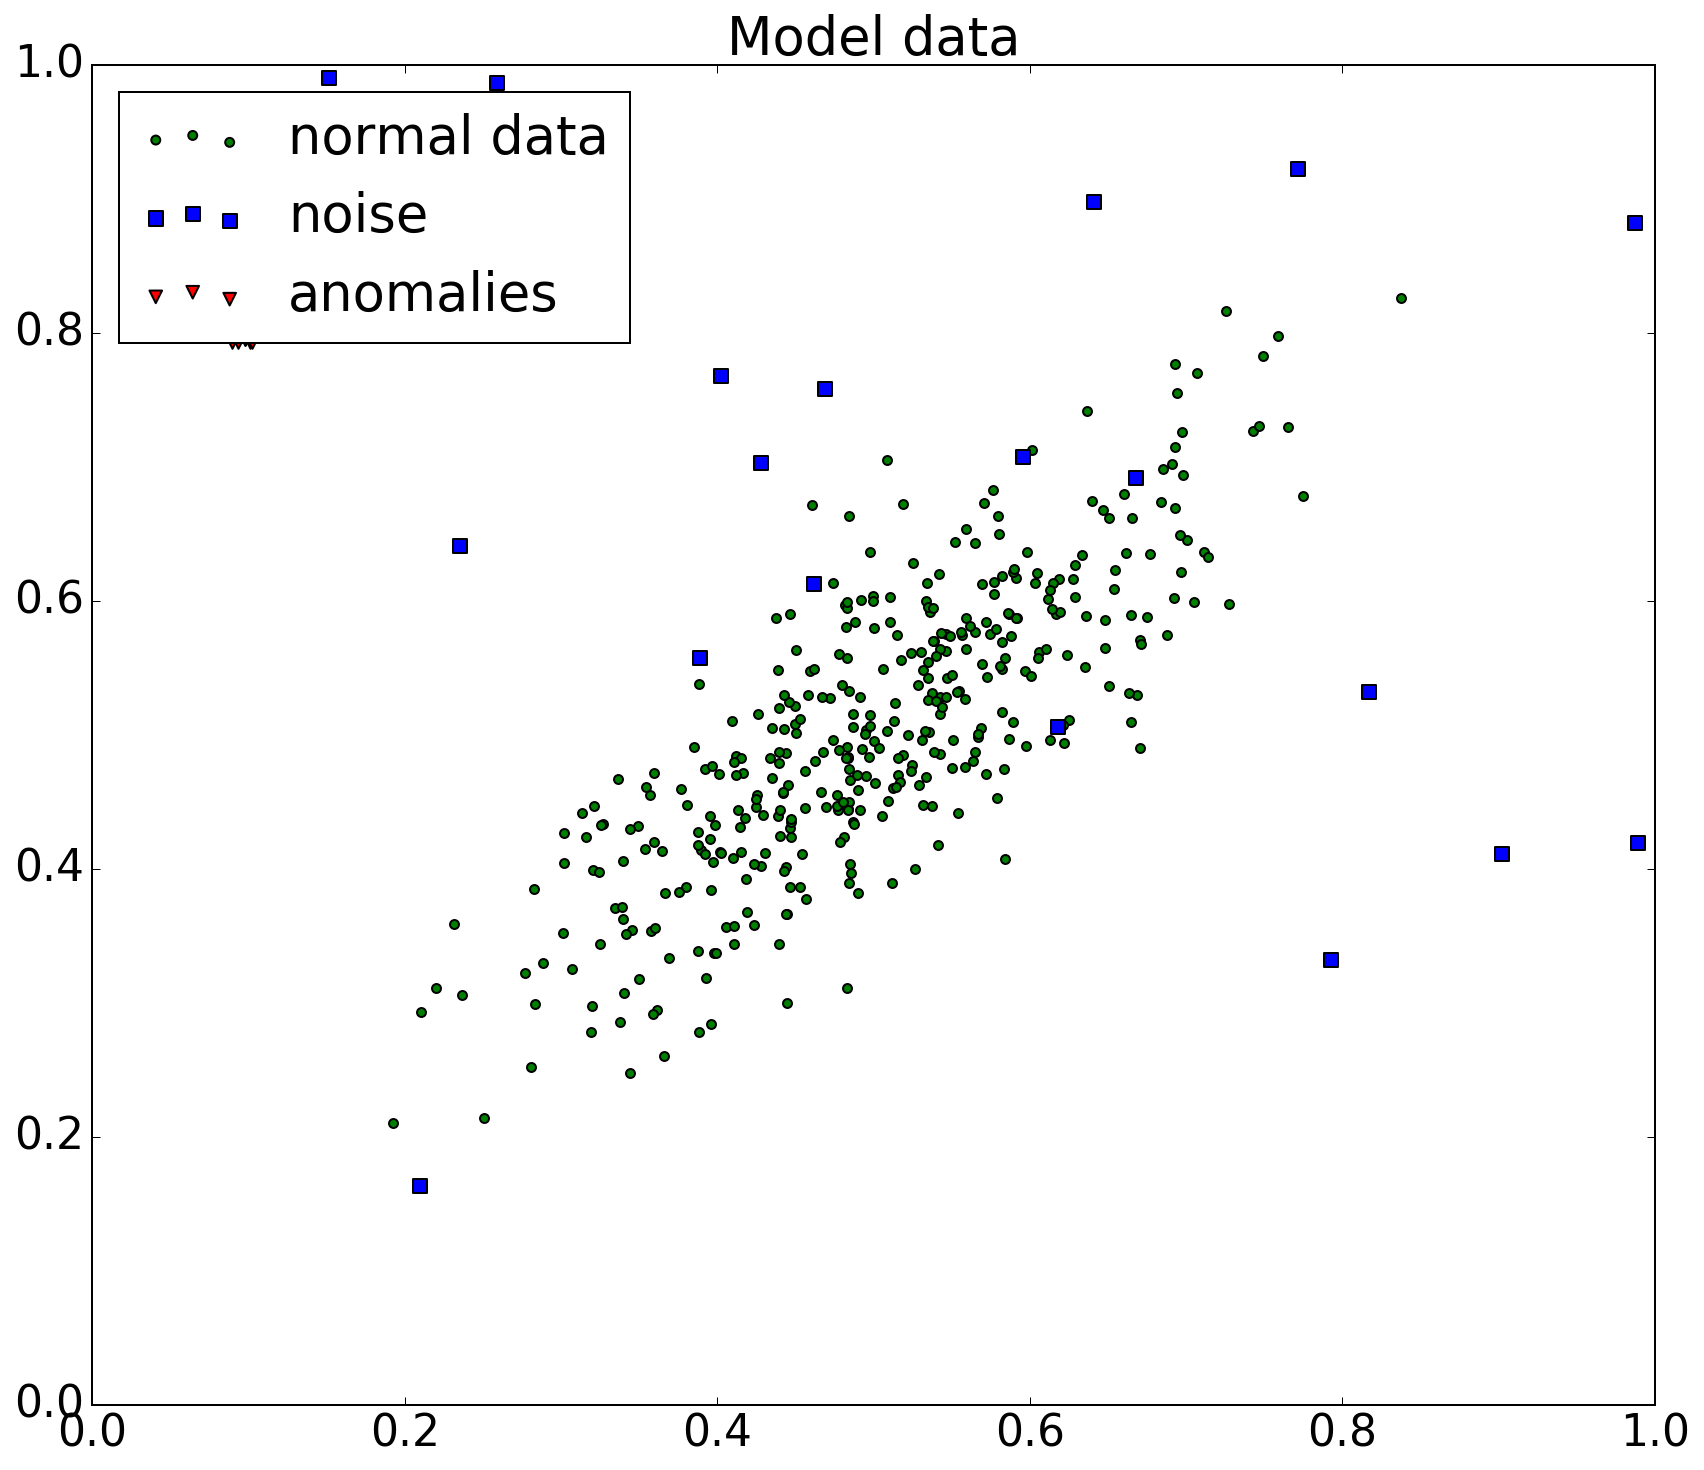

In [175]:
rcParams['figure.figsize'] = 14, 12
plt.scatter(normals[:, 0], normals[:, 1], c='g', label="normal data")
plt.scatter(noise[:, 0], noise[:, 1], c='b', marker='s', s=50, label="noise")
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='r', marker='v', s=40, label="anomalies")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(loc=2)
plt.title("Model data")
plt.show()

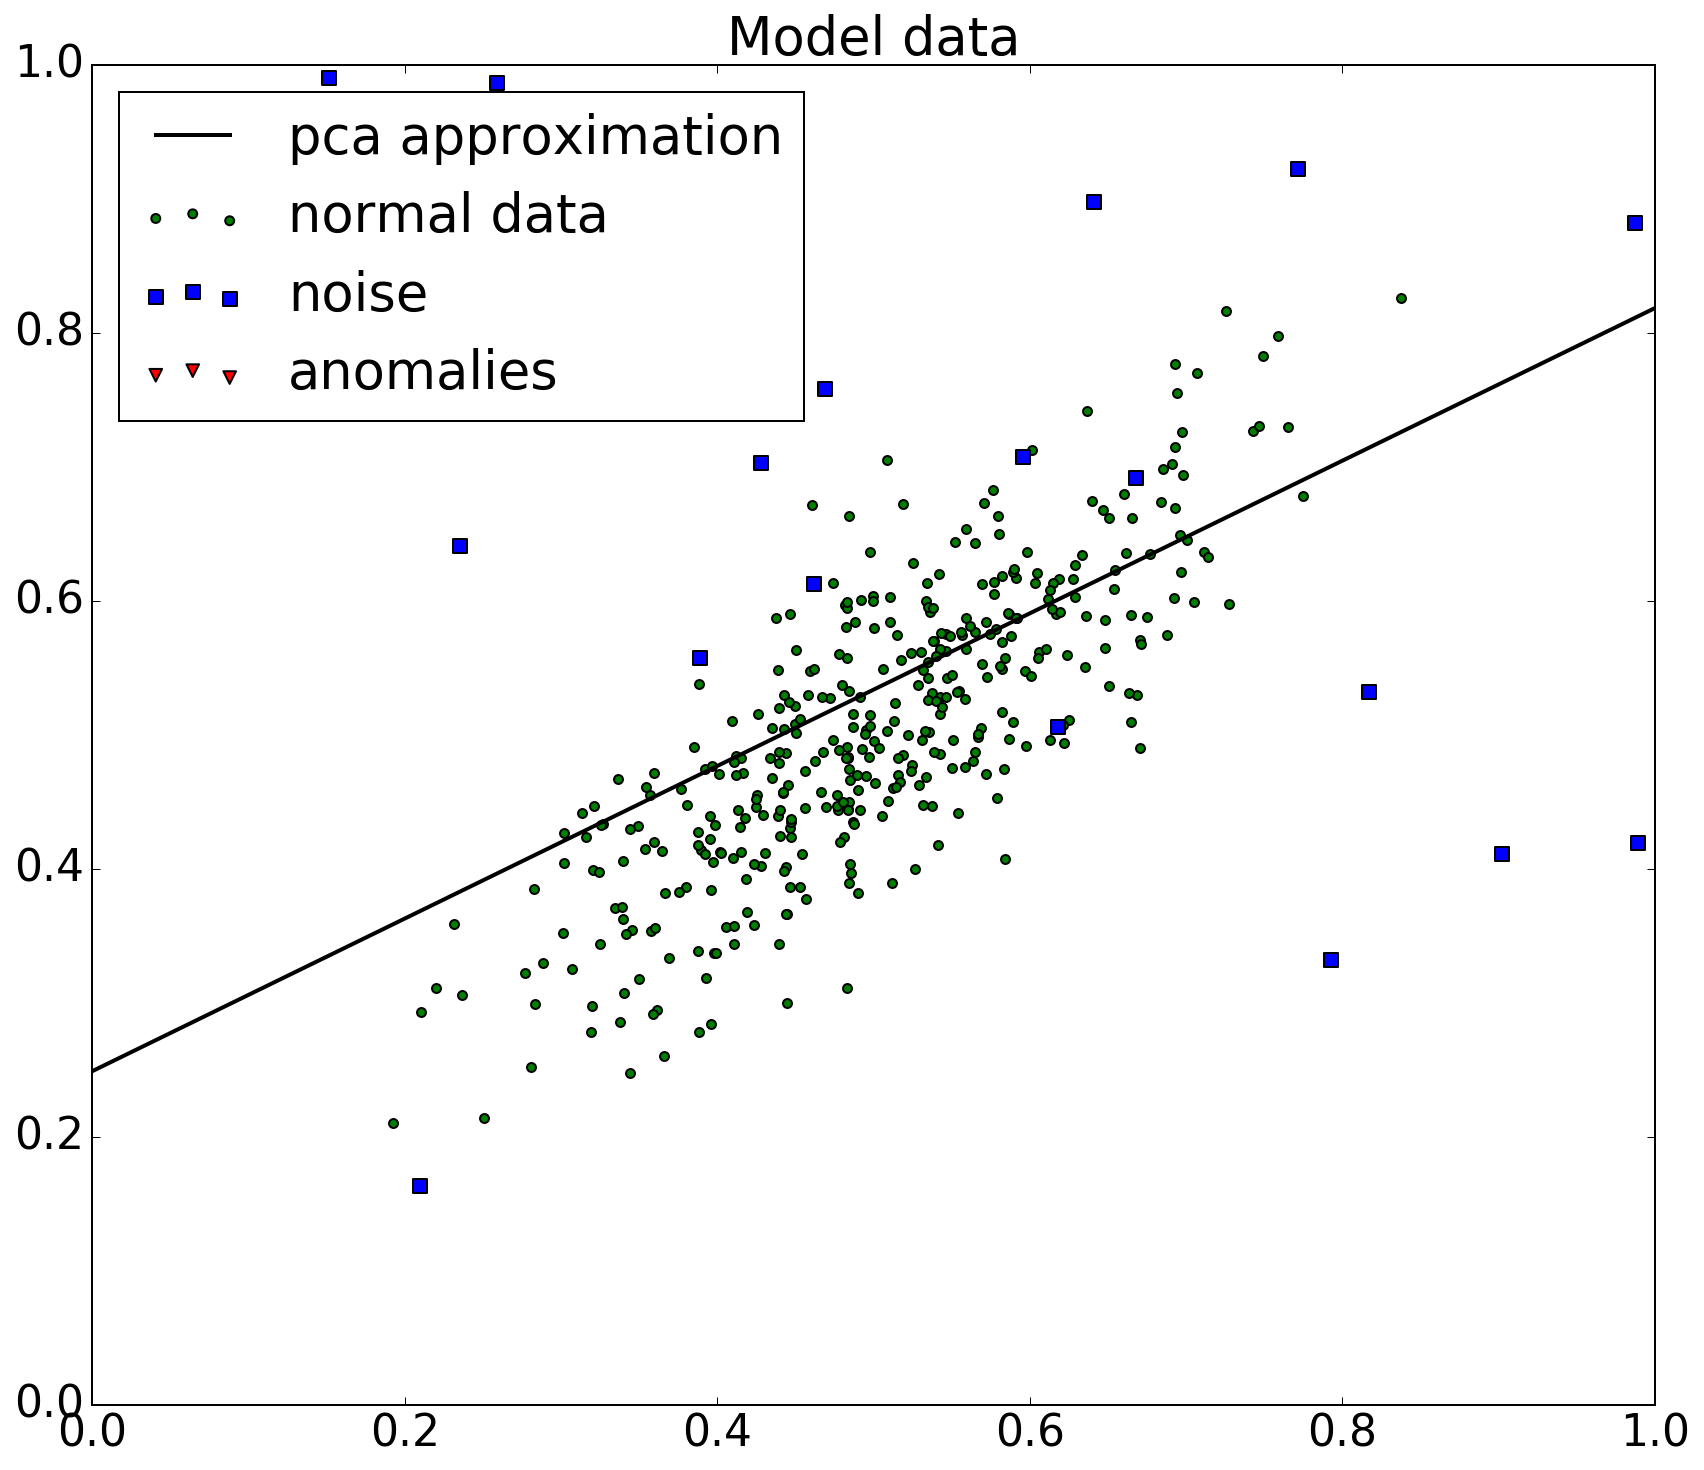

In [176]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1).fit(DF)

plt.scatter(normals[:, 0], normals[:, 1], c='g', label="normal data")
plt.scatter(noise[:, 0], noise[:, 1], c='b', marker='s', s=50, label="noise")
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='r', marker='v', s=40, label="anomalies")

point = pca.inverse_transform([0])
point1 = point - pca.components_[0]
point2 = point + pca.components_[0]
plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 'k-', lw=2, label="pca approximation")

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(loc=2)
plt.title("Model data")
plt.show()

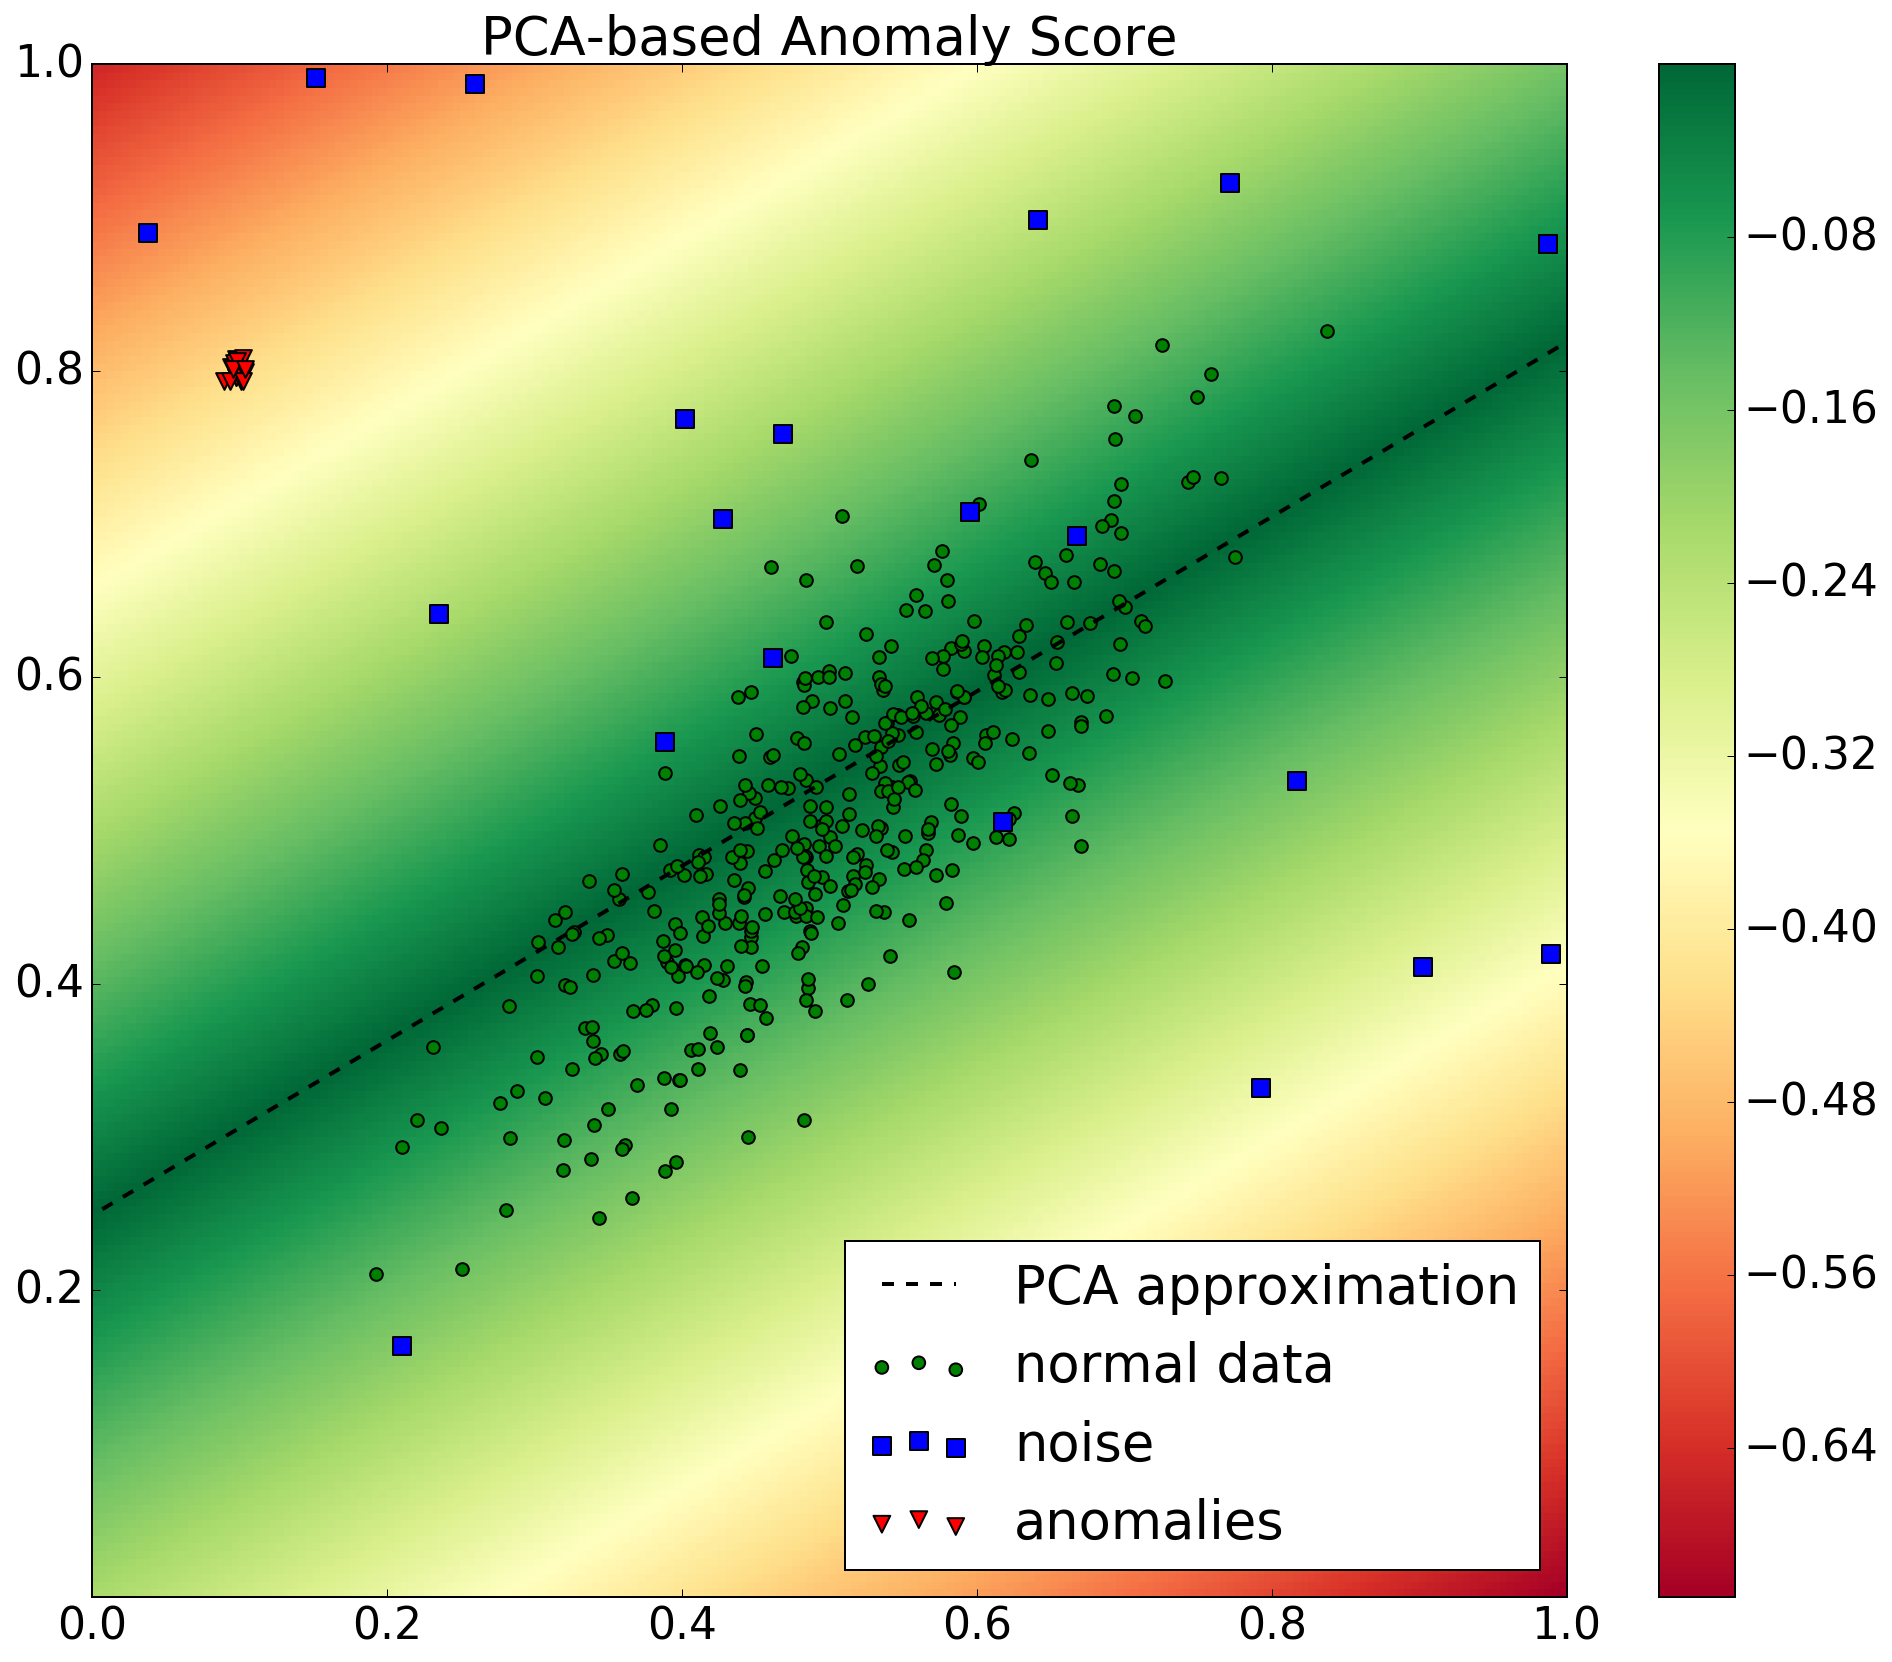

In [180]:
def a(X):
    return -((X - pca.inverse_transform(pca.transform(X)))**2).sum(axis=1)**0.5

f, ax = plt.subplots(1, 1)

point = pca.inverse_transform([0])
point1 = point - pca.components_[0]
point2 = point + pca.components_[0]
ax.plot([point1[0], point2[0]], [point1[1], point2[1]], '--', color='black', lw=2, label="PCA approximation")

draw(f, ax, a, "PCA-based Anomaly Score")
plt.legend(loc=4)

In [181]:
def draw(ax, score, title):
    y, x = np.mgrid[slice(0, 1.001, 0.005),
                    slice(0, 1.001, 0.005)]
    z = score(np.array([x.flatten(), y.flatten()]).T).reshape(201, 201)
    
    colorbar_data = ax.pcolor(x, y, z, cmap=plt.cm.RdYlGn, vmin=-0.5, vmax=0)
    ax.scatter(normals[:, 0], normals[:, 1], c='g', s=40, label="normal data")
    ax.scatter(noise[:, 0], noise[:, 1], c='b', marker='s', s=80, label="noise")
    ax.scatter(anomalies[:, 0], anomalies[:, 1], c='r', marker='v', s=70, label="anomalies") 

    ax.set_xlim(0, 1)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_ylim(0, 1)
    ax.set_title(title)
    plt.tight_layout()
    return colorbar_data

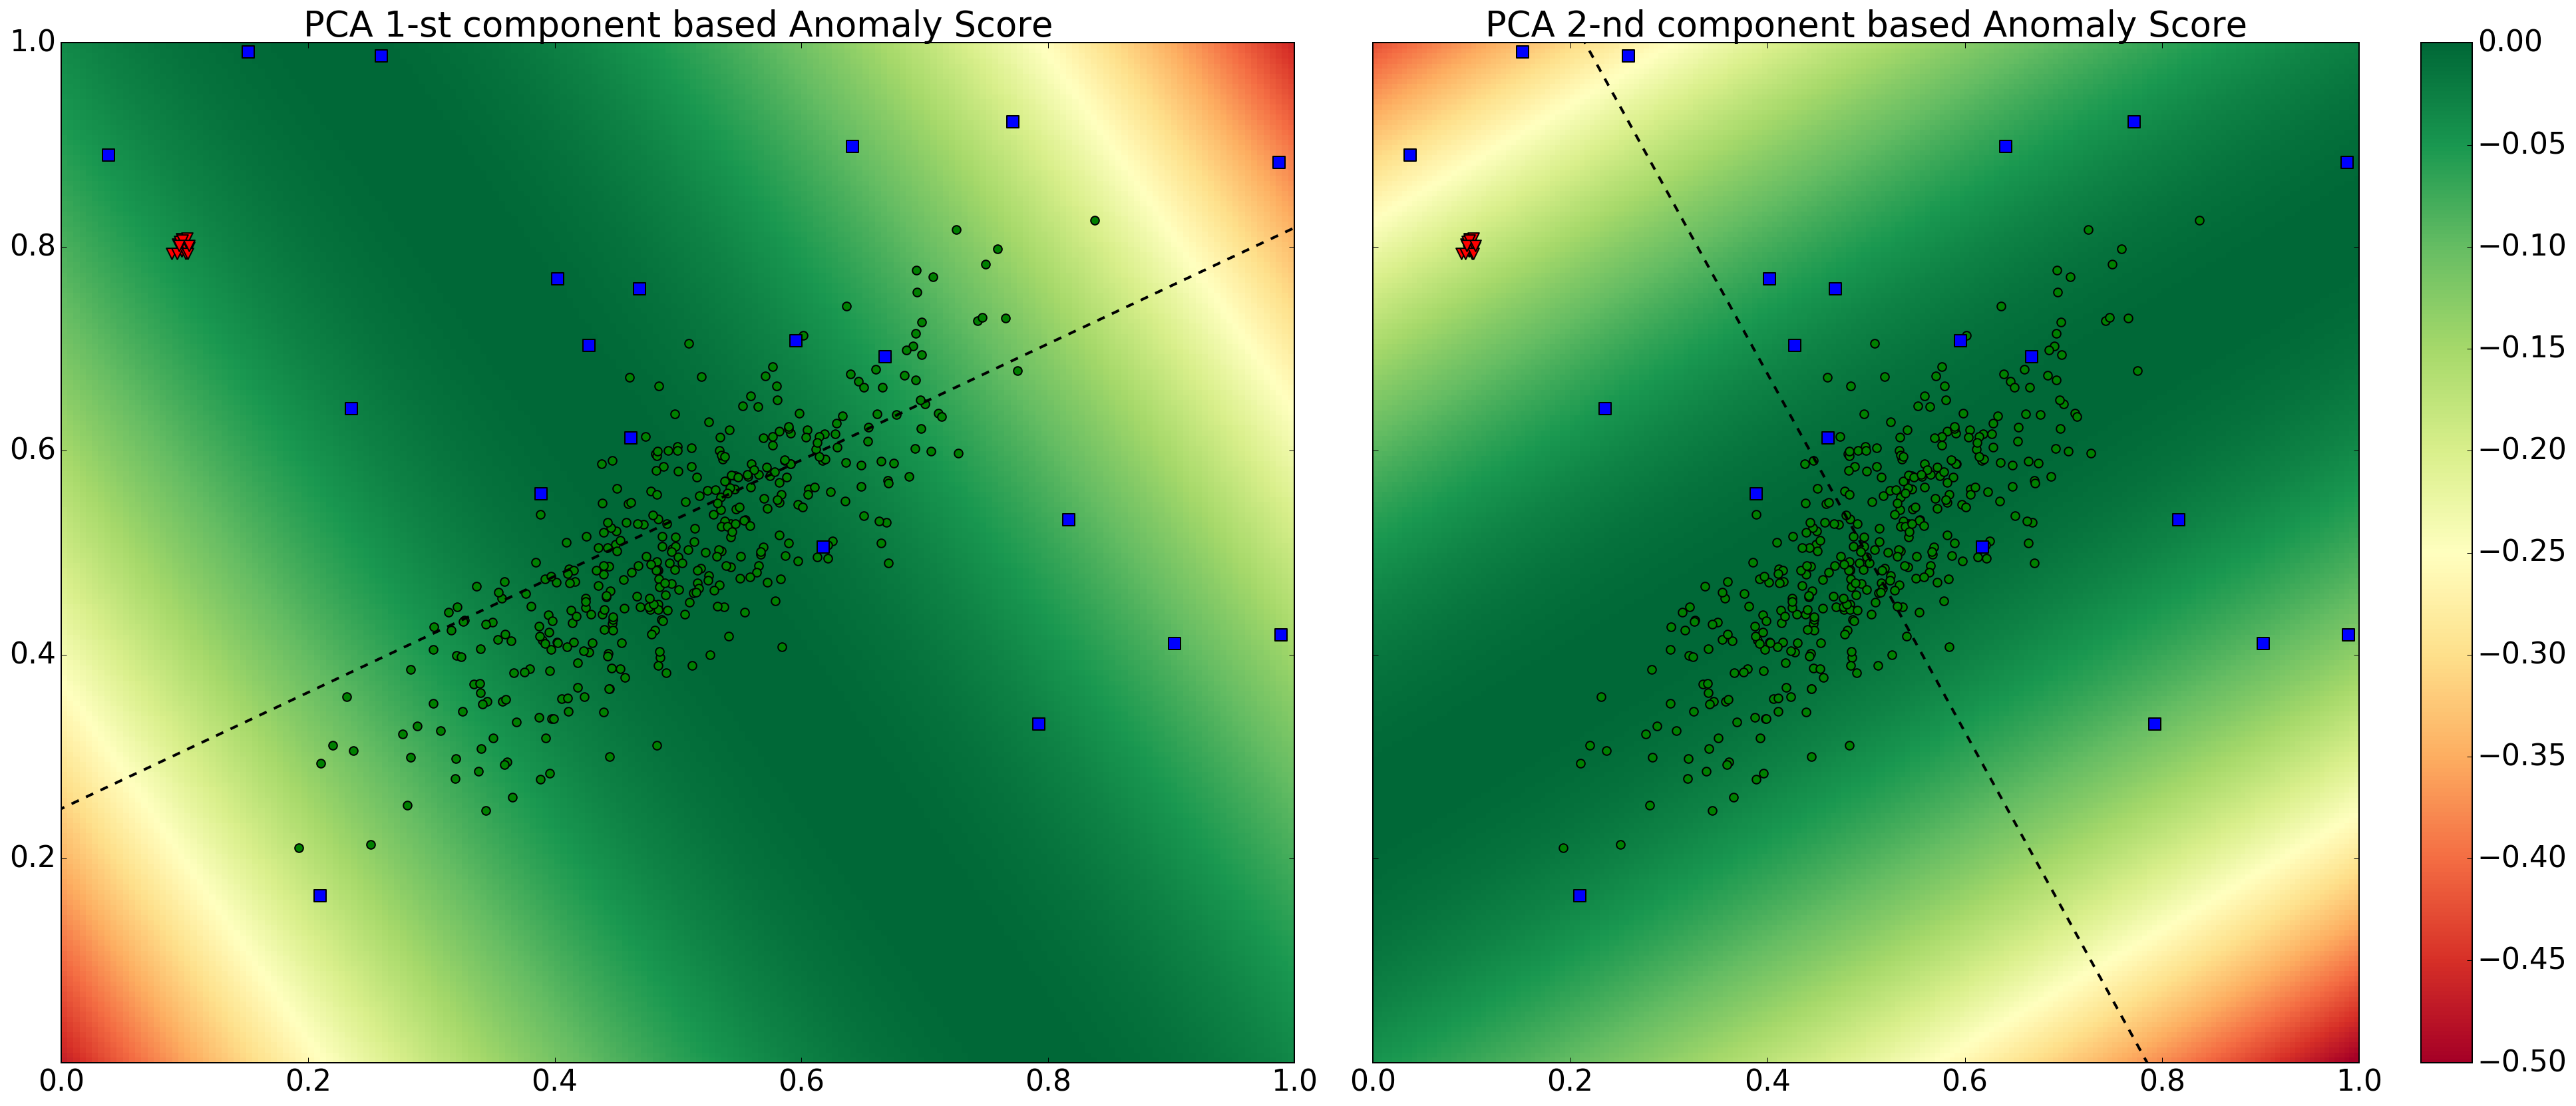

In [184]:
rcParams['figure.figsize'] = 28, 12
f, (plt1, plt2) = plt.subplots(1, 2, sharey=True)

pca = PCA(n_components=1).fit(DF)

point = pca.inverse_transform([0])
point1 = point - pca.components_[0]
point2 = point + pca.components_[0]
plt1.plot([point1[0], point2[0]], [point1[1], point2[1]], '--', c='black', lw=2)

def a(X):
    trans = pca.transform(X)
    return -trans**2

draw(plt1, a, "PCA 1-st component based Anomaly Score")

pca = PCA(n_components=2).fit(DF)

point = pca.inverse_transform([0, 0])
point1 = point - pca.components_[1]
point2 = point + pca.components_[1]
plt2.plot([point1[0], point2[0]], [point1[1], point2[1]], '--', c='black', lw=2)

def a(X):
    trans = pca.transform(X)
    return -trans[:, 1]**2

f.colorbar(draw(plt2, a, "PCA 2-nd component based Anomaly Score"))

In [153]:
def draw(f, ax, score, title):
    y, x = np.mgrid[slice(0, 1.001, 0.005),
                    slice(0, 1.001, 0.005)]
    z = score(np.array([x.flatten(), y.flatten()]).T).reshape(201, 201)
    
    f.colorbar(ax.pcolor(x, y, z, cmap=plt.cm.RdYlGn))
    ax.scatter(normals[:, 0], normals[:, 1], c='g', s=40, label="normal data")
    ax.scatter(noise[:, 0], noise[:, 1], c='b', marker='s', s=80, label="noise")
    ax.scatter(anomalies[:, 0], anomalies[:, 1], c='r', marker='v', s=70, label="anomalies") 

    ax.set_xlim(0, 1)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_ylim(0, 1)
    ax.set_title(title)
    plt.tight_layout()

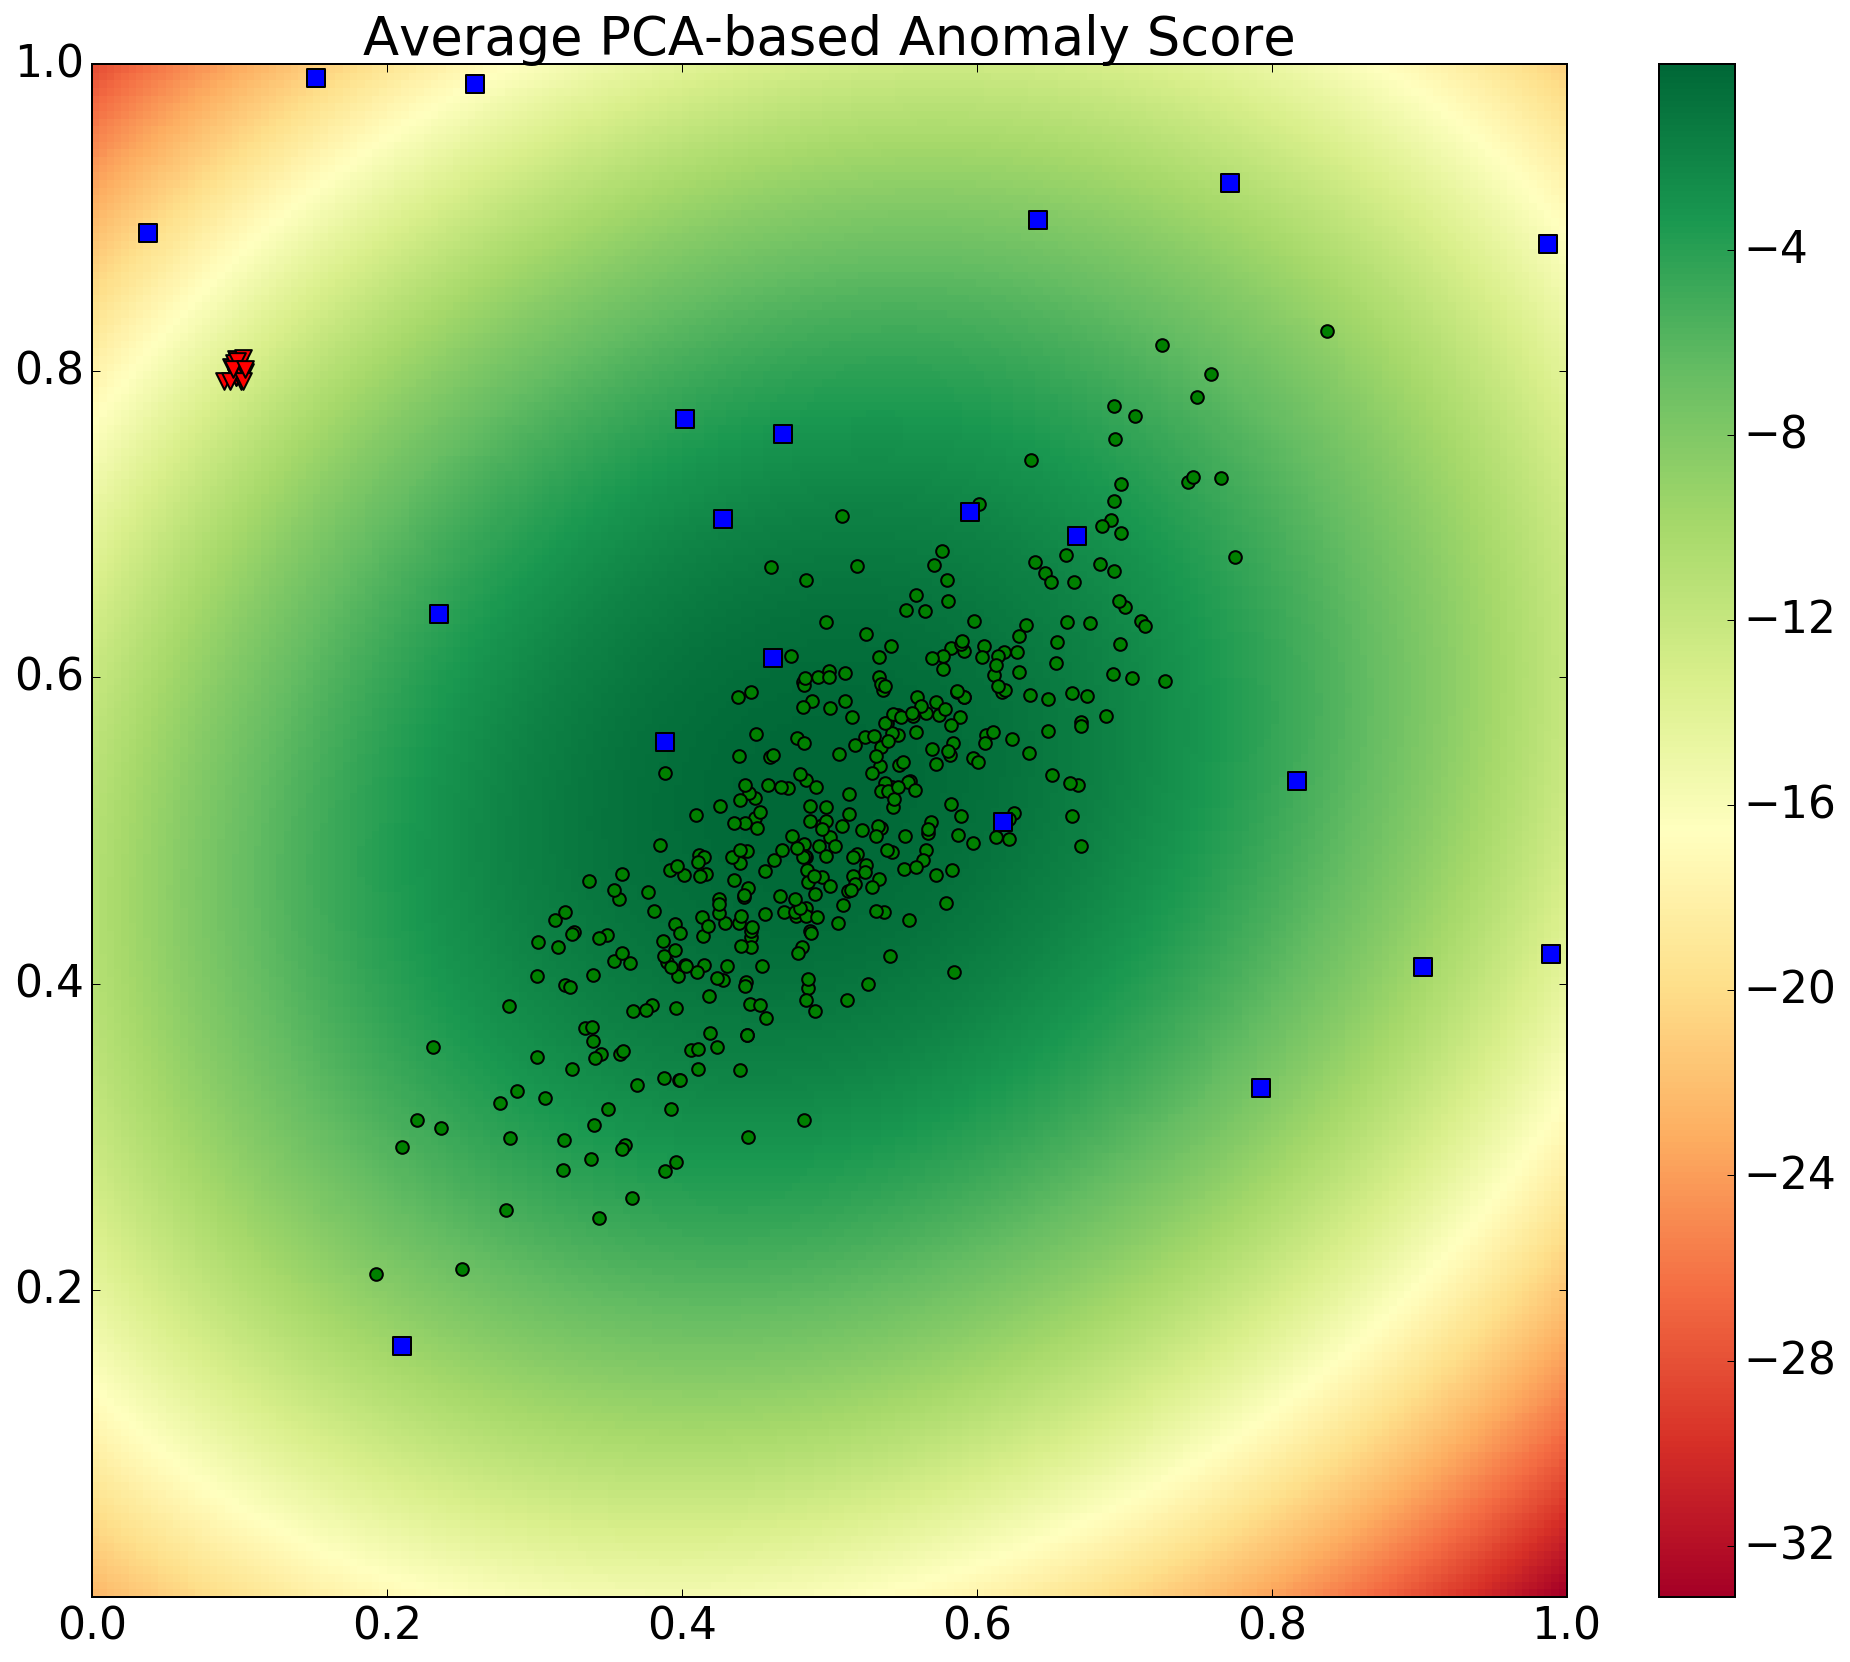

In [154]:
rcParams['figure.figsize'] = 14, 12
pca = PCA(n_components=2).fit(DF)

f, (plt1) = plt.subplots(1, 1)

def a(X):
    trans = pca.transform(X)
    trans **= 2
    trans[:, 0] /= pca.explained_variance_[0]
    trans[:, 1] /= pca.explained_variance_[1]
    return -trans.sum(axis=1)

draw(f, plt1, a, "Average PCA-based Anomaly Score")

# Метричні алгоритми

In [409]:
def draw(ax, score, title):
    y, x = np.mgrid[slice(0, 1.001, 0.005),
                    slice(0, 1.001, 0.005)]
    z = score(np.array([x.flatten(), y.flatten()]).T).reshape(201, 201)
    
    ax.pcolor(x, y, z, cmap=plt.cm.RdYlGn)
    ax.scatter(normals[:, 0], normals[:, 1], c='g', s=40, label="normal data")
    ax.scatter(noise[:, 0], noise[:, 1], c='b', marker='s', s=80, label="noise")
    ax.scatter(anomalies[:, 0], anomalies[:, 1], c='r', marker='v', s=70, label="anomalies") 

    ax.set_xlim(0, 1)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_ylim(0, 1)
    ax.set_title(title)
    plt.tight_layout()

In [410]:
rnd = np.random.RandomState(seed=317)
K1 = 0.03 * rnd.normal(size=(200, 2)) + 0.1
K2 = 0.08 * rnd.normal(size=(200, 2)) + 0.5
normals = np.vstack([K1, K2])
noise = rnd.uniform(0, 1, size=(20, 2))
anomalies = 0.005 * rnd.normal(size=(20, 2)) + 0.1
anomalies[:, 1] += 0.7

DF = np.vstack([normals, noise, anomalies])

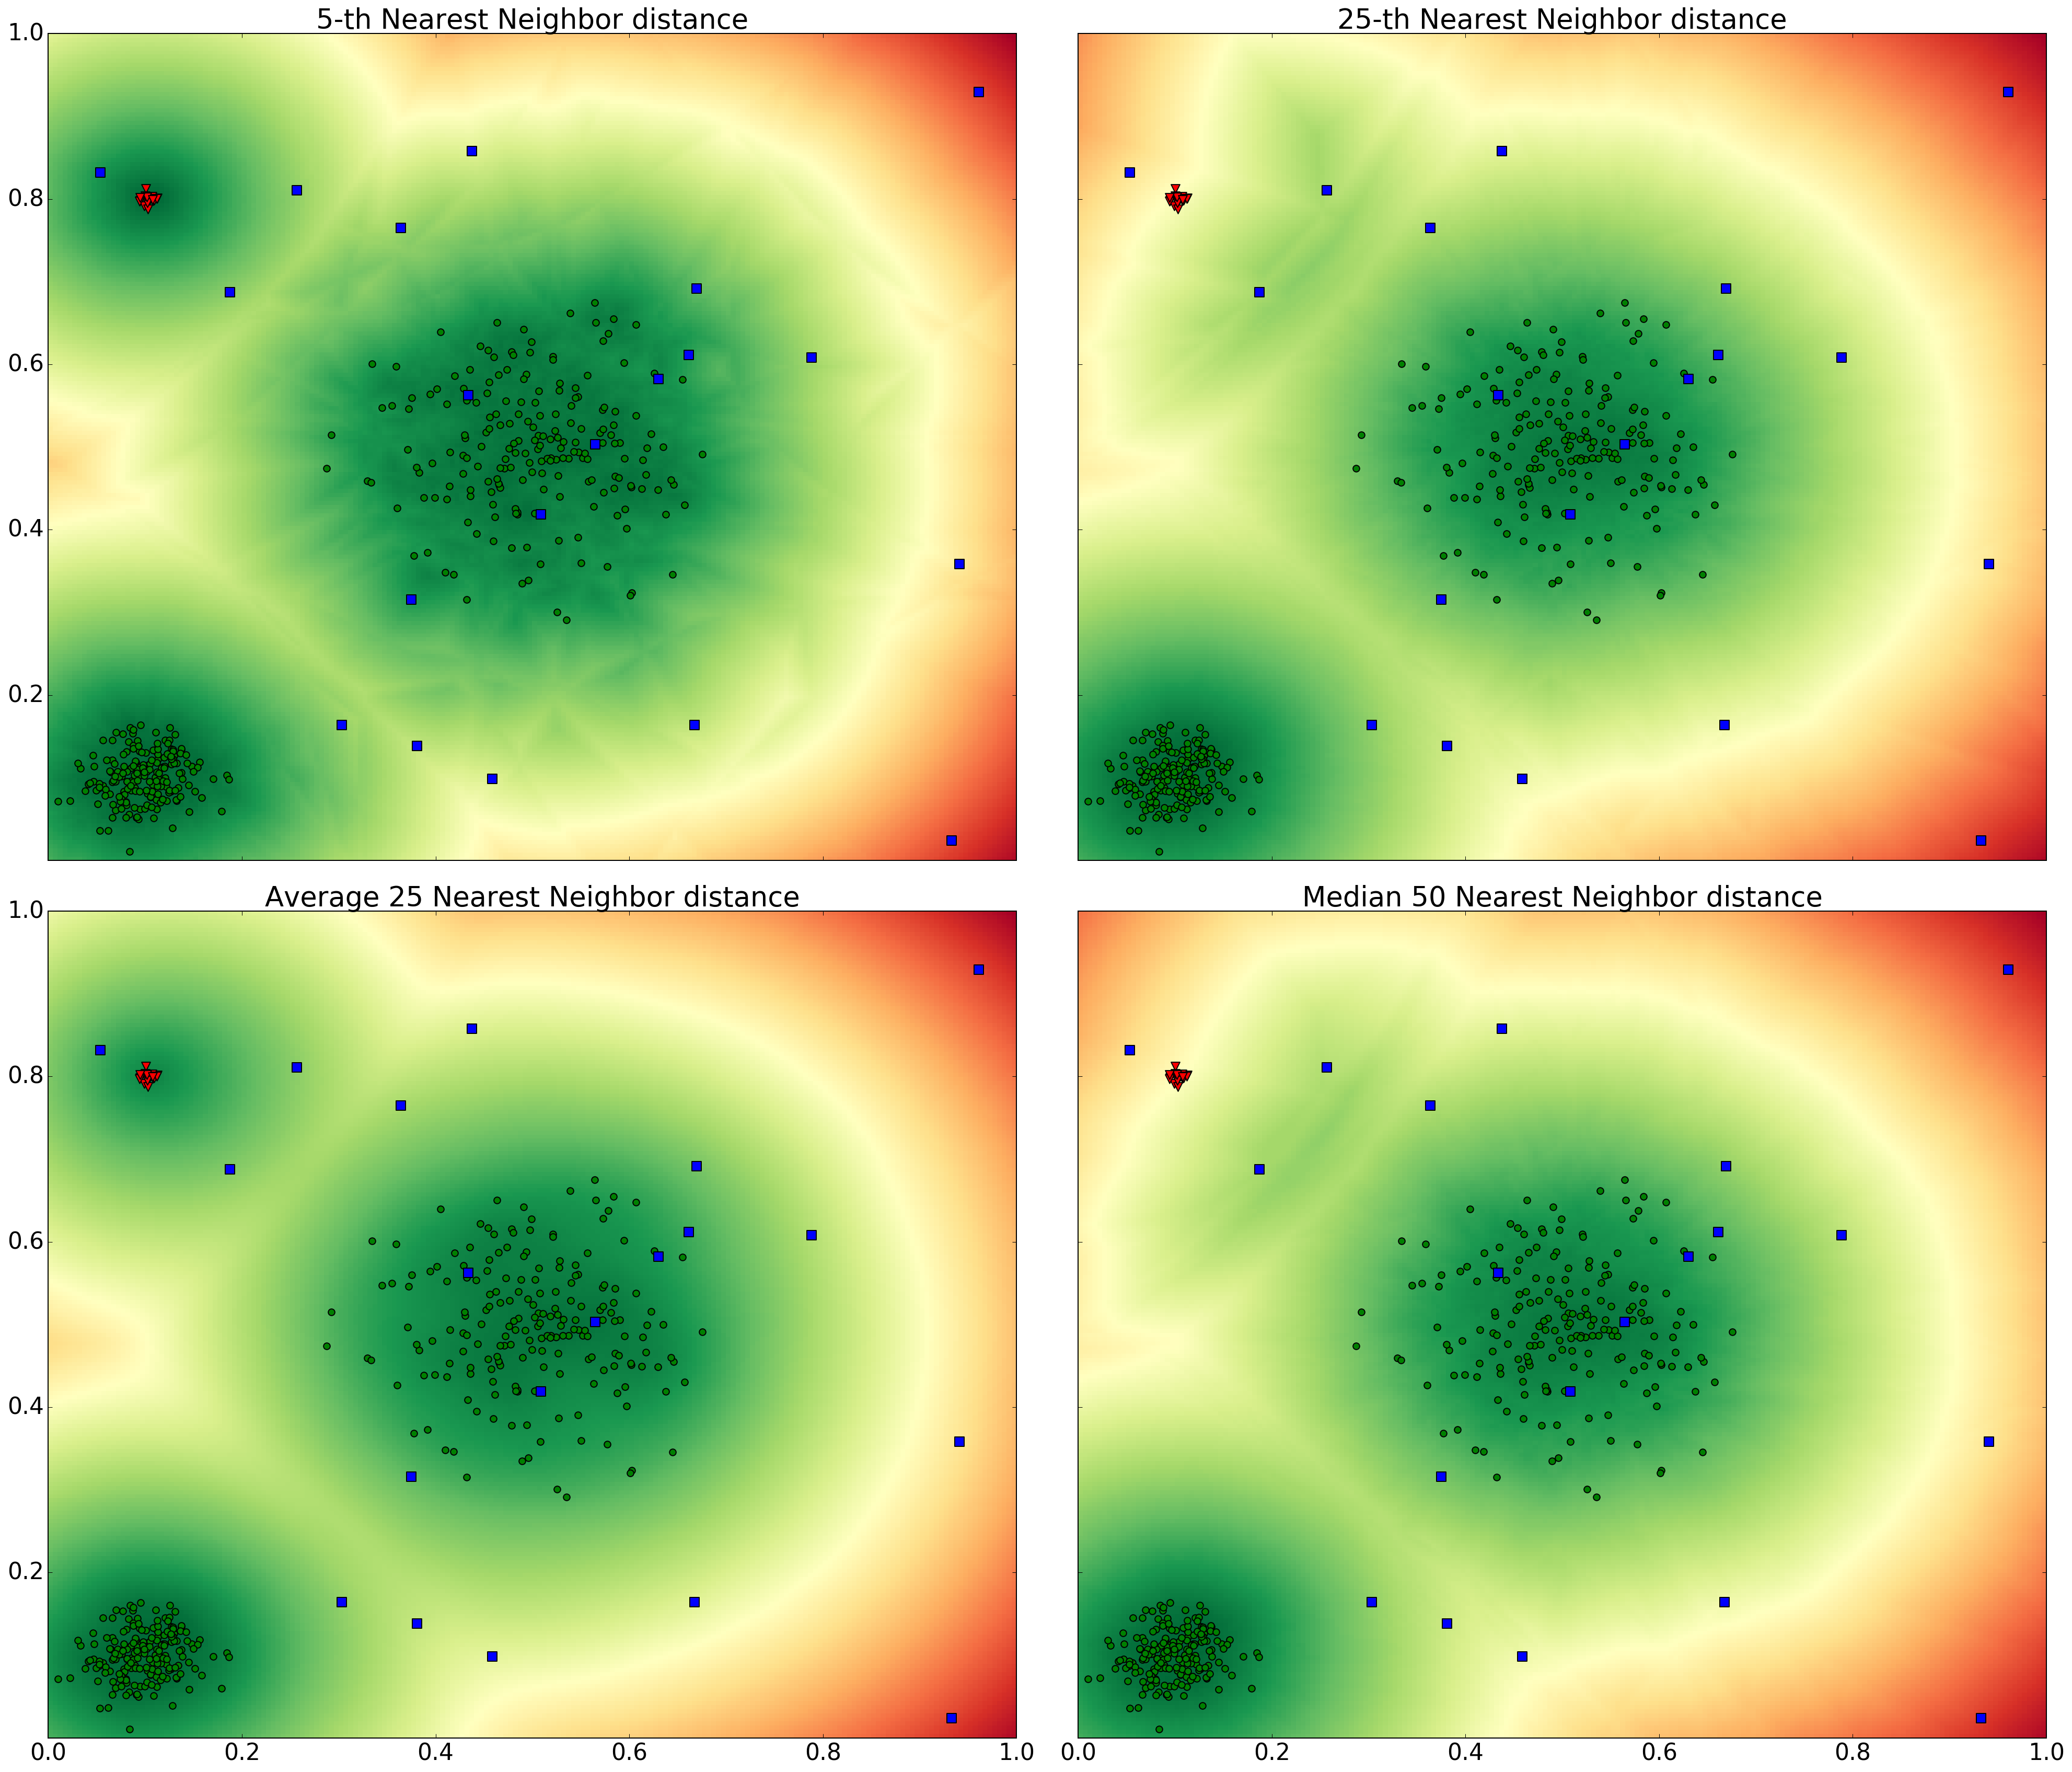

In [417]:
from sklearn.metrics.pairwise import pairwise_distances as dist_matrix

rcParams['figure.figsize'] = 28, 24
pca = PCA(n_components=2).fit(DF)

f, ((plt1, plt2), (plt3, plt4)) = plt.subplots(2, 2, sharex=True, sharey=True)

def a(X):
    DM = dist_matrix(X, DF)
    return -np.sort(DM, axis=1)[:, 4]
    
draw(plt1, a, "5-th Nearest Neighbor distance")

def a(X):
    DM = dist_matrix(X, DF)
    return -np.sort(DM, axis=1)[:, 24]
    
draw(plt2, a, "25-th Nearest Neighbor distance")

from sklearn.metrics.pairwise import pairwise_distances as dist_matrix

def a(X):
    DM = dist_matrix(X, DF)
    return -np.sort(DM, axis=1)[:, :25].mean(axis=1)
    
draw(plt3, a, "Average 25 Nearest Neighbor distance")

def a(X):
    DM = dist_matrix(X, DF)
    return -np.median(np.sort(DM, axis=1)[:, :50], axis=1)
    
draw(plt4, a, "Median 50 Nearest Neighbor distance")

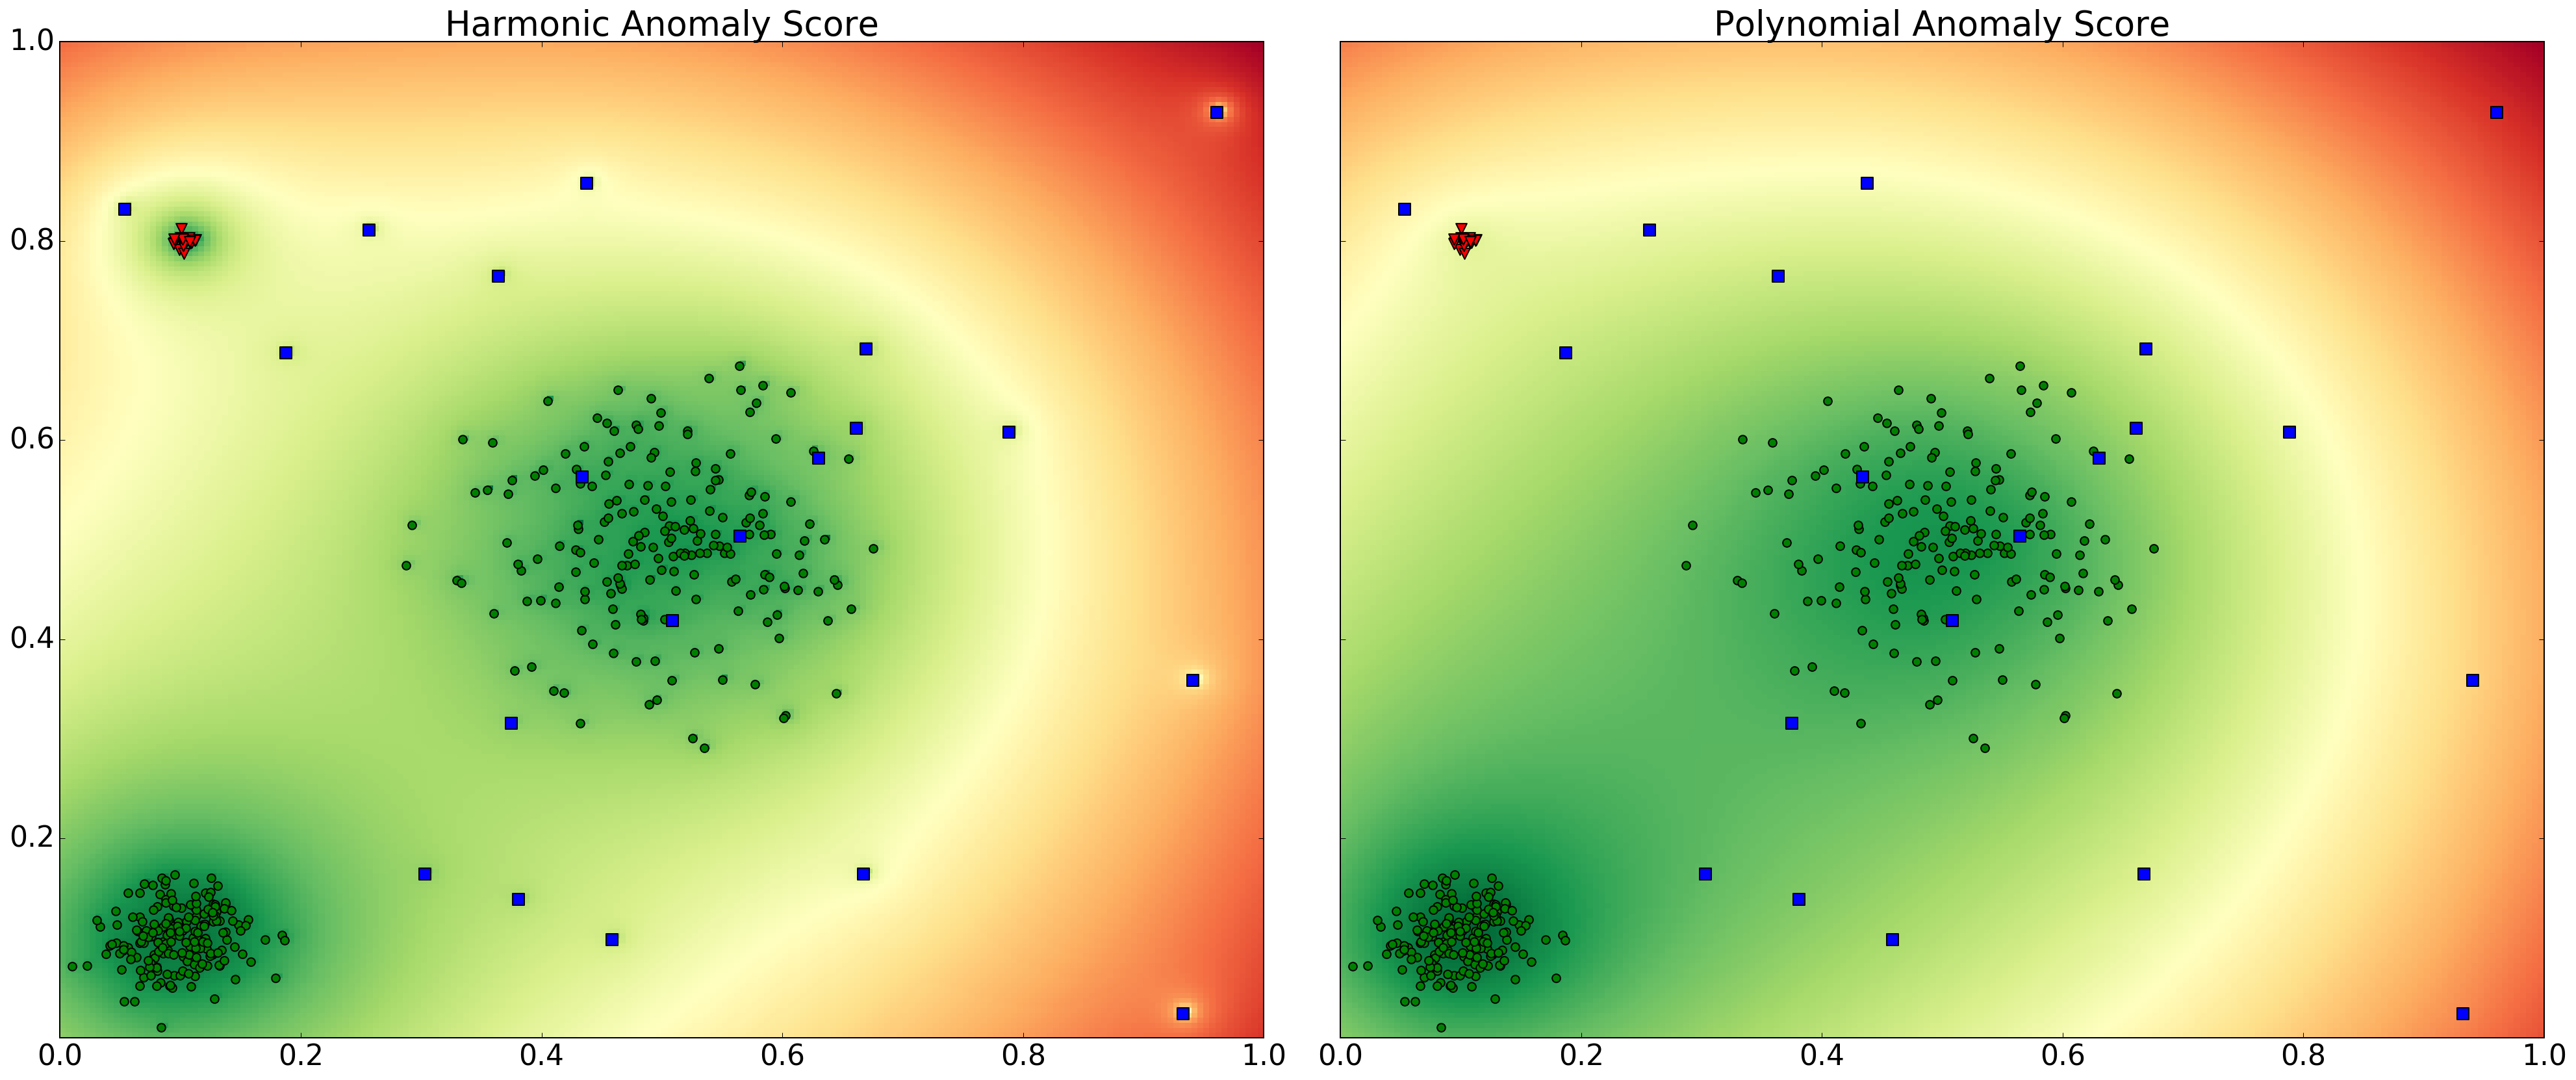

In [414]:
from sklearn.metrics.pairwise import pairwise_distances as dist_matrix

rcParams['figure.figsize'] = 28, 12

f, (plt1, plt2) = plt.subplots(1, 2, sharex=True, sharey=True)

def a(X):
    DM = dist_matrix(X, DF)
    return -len(DF) / (1 / DM).sum(axis=1)
    
draw(plt1, a, "Harmonic Anomaly Score")

def a(X):
    DM = dist_matrix(X, DF)
    return -(DM ** (1 / len(DF))).prod(axis=1)
    
draw(plt2, a, "Polynomial Anomaly Score")

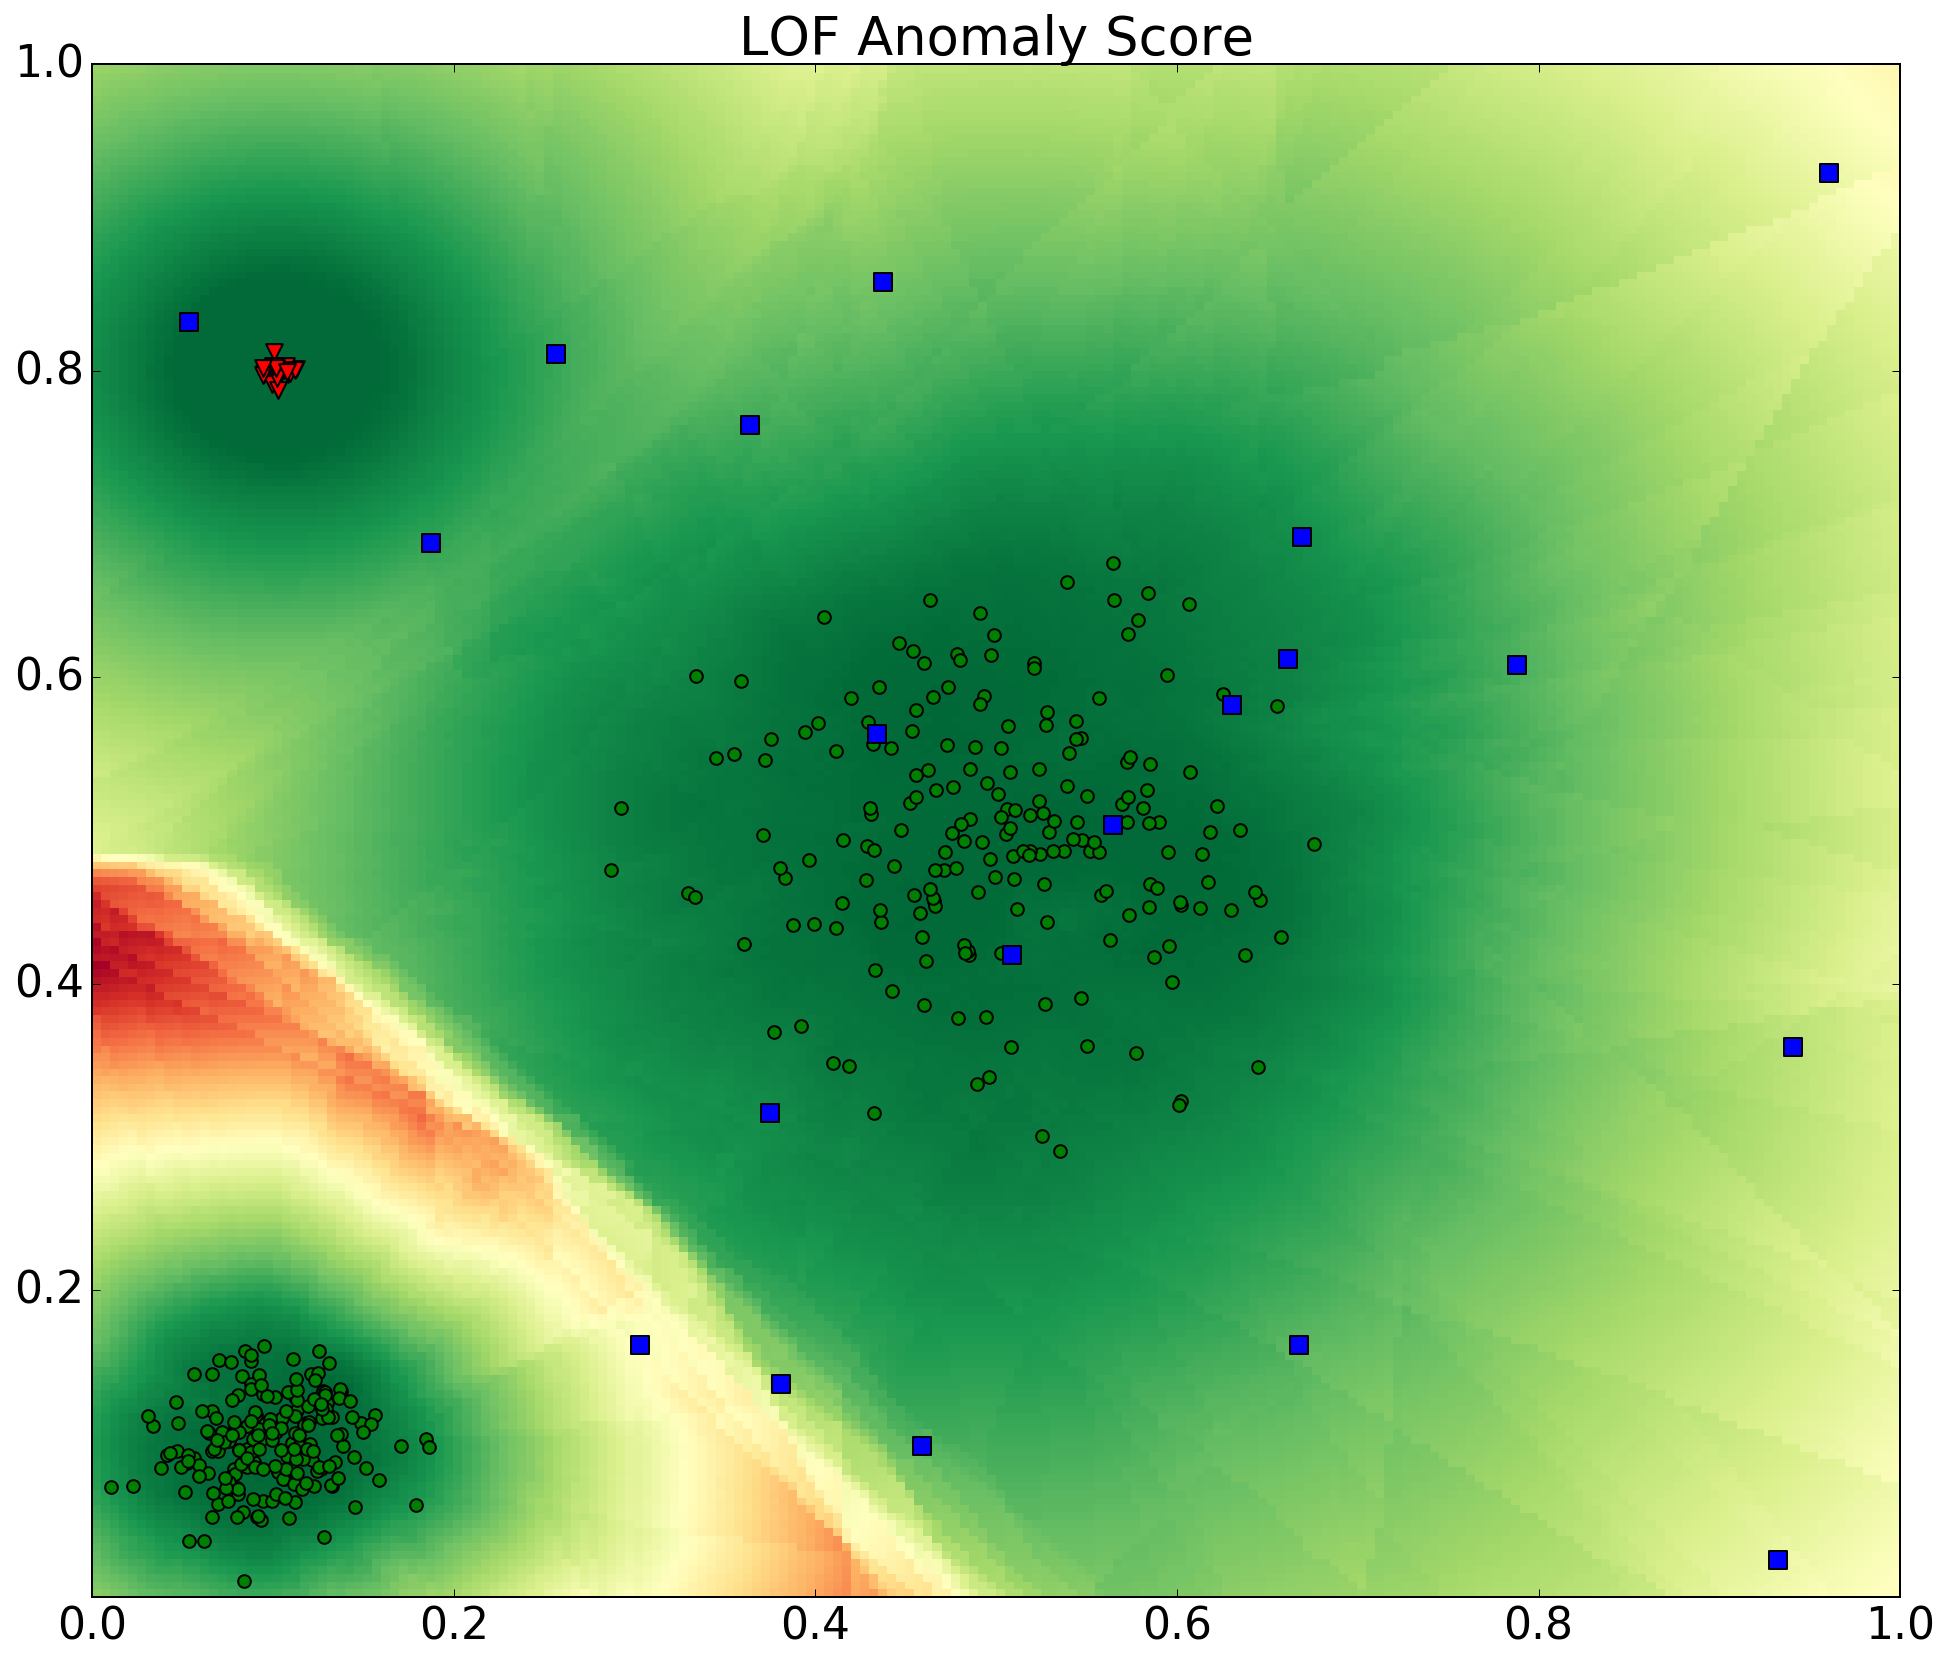

In [167]:
rcParams['figure.figsize'] = 14, 12
f, (plt1) = plt.subplots(1, 1)

draw(plt1, exp.LOF(20, metric="euclidean").fit(DF).decision_function, "LOF Anomaly Score")

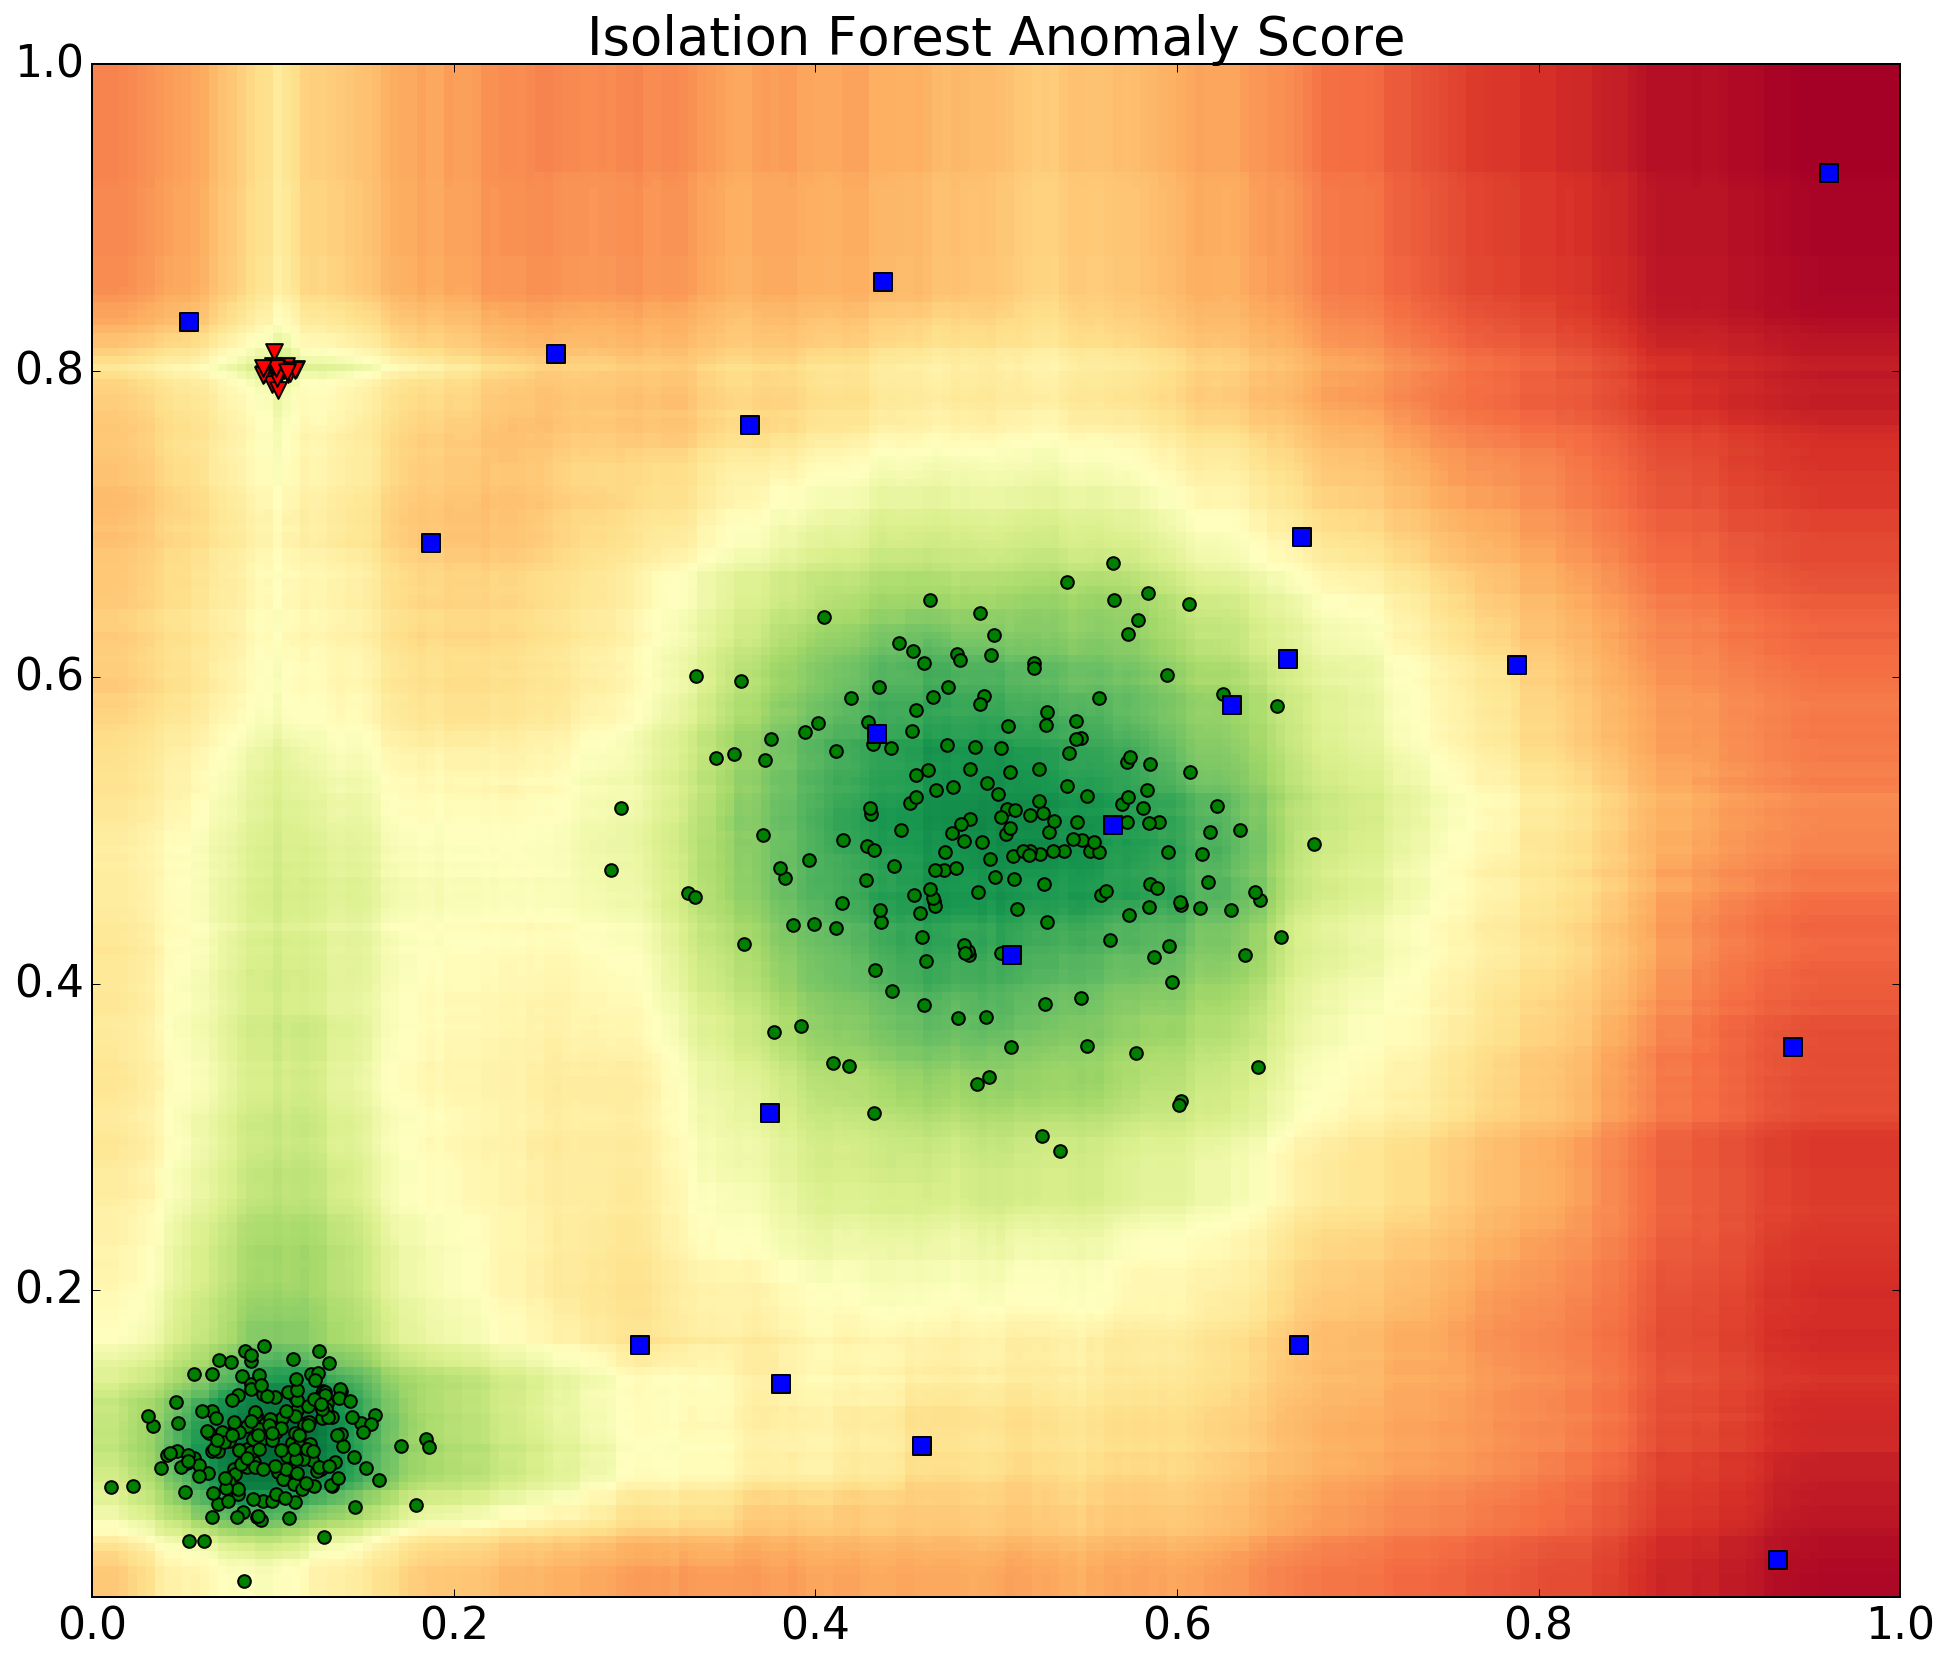

In [169]:
rcParams['figure.figsize'] = 14, 12
f, (plt1) = plt.subplots(1, 1)

draw(plt1, IsolationForest().fit(DF).decision_function, "Isolation Forest Anomaly Score")

## Покращення

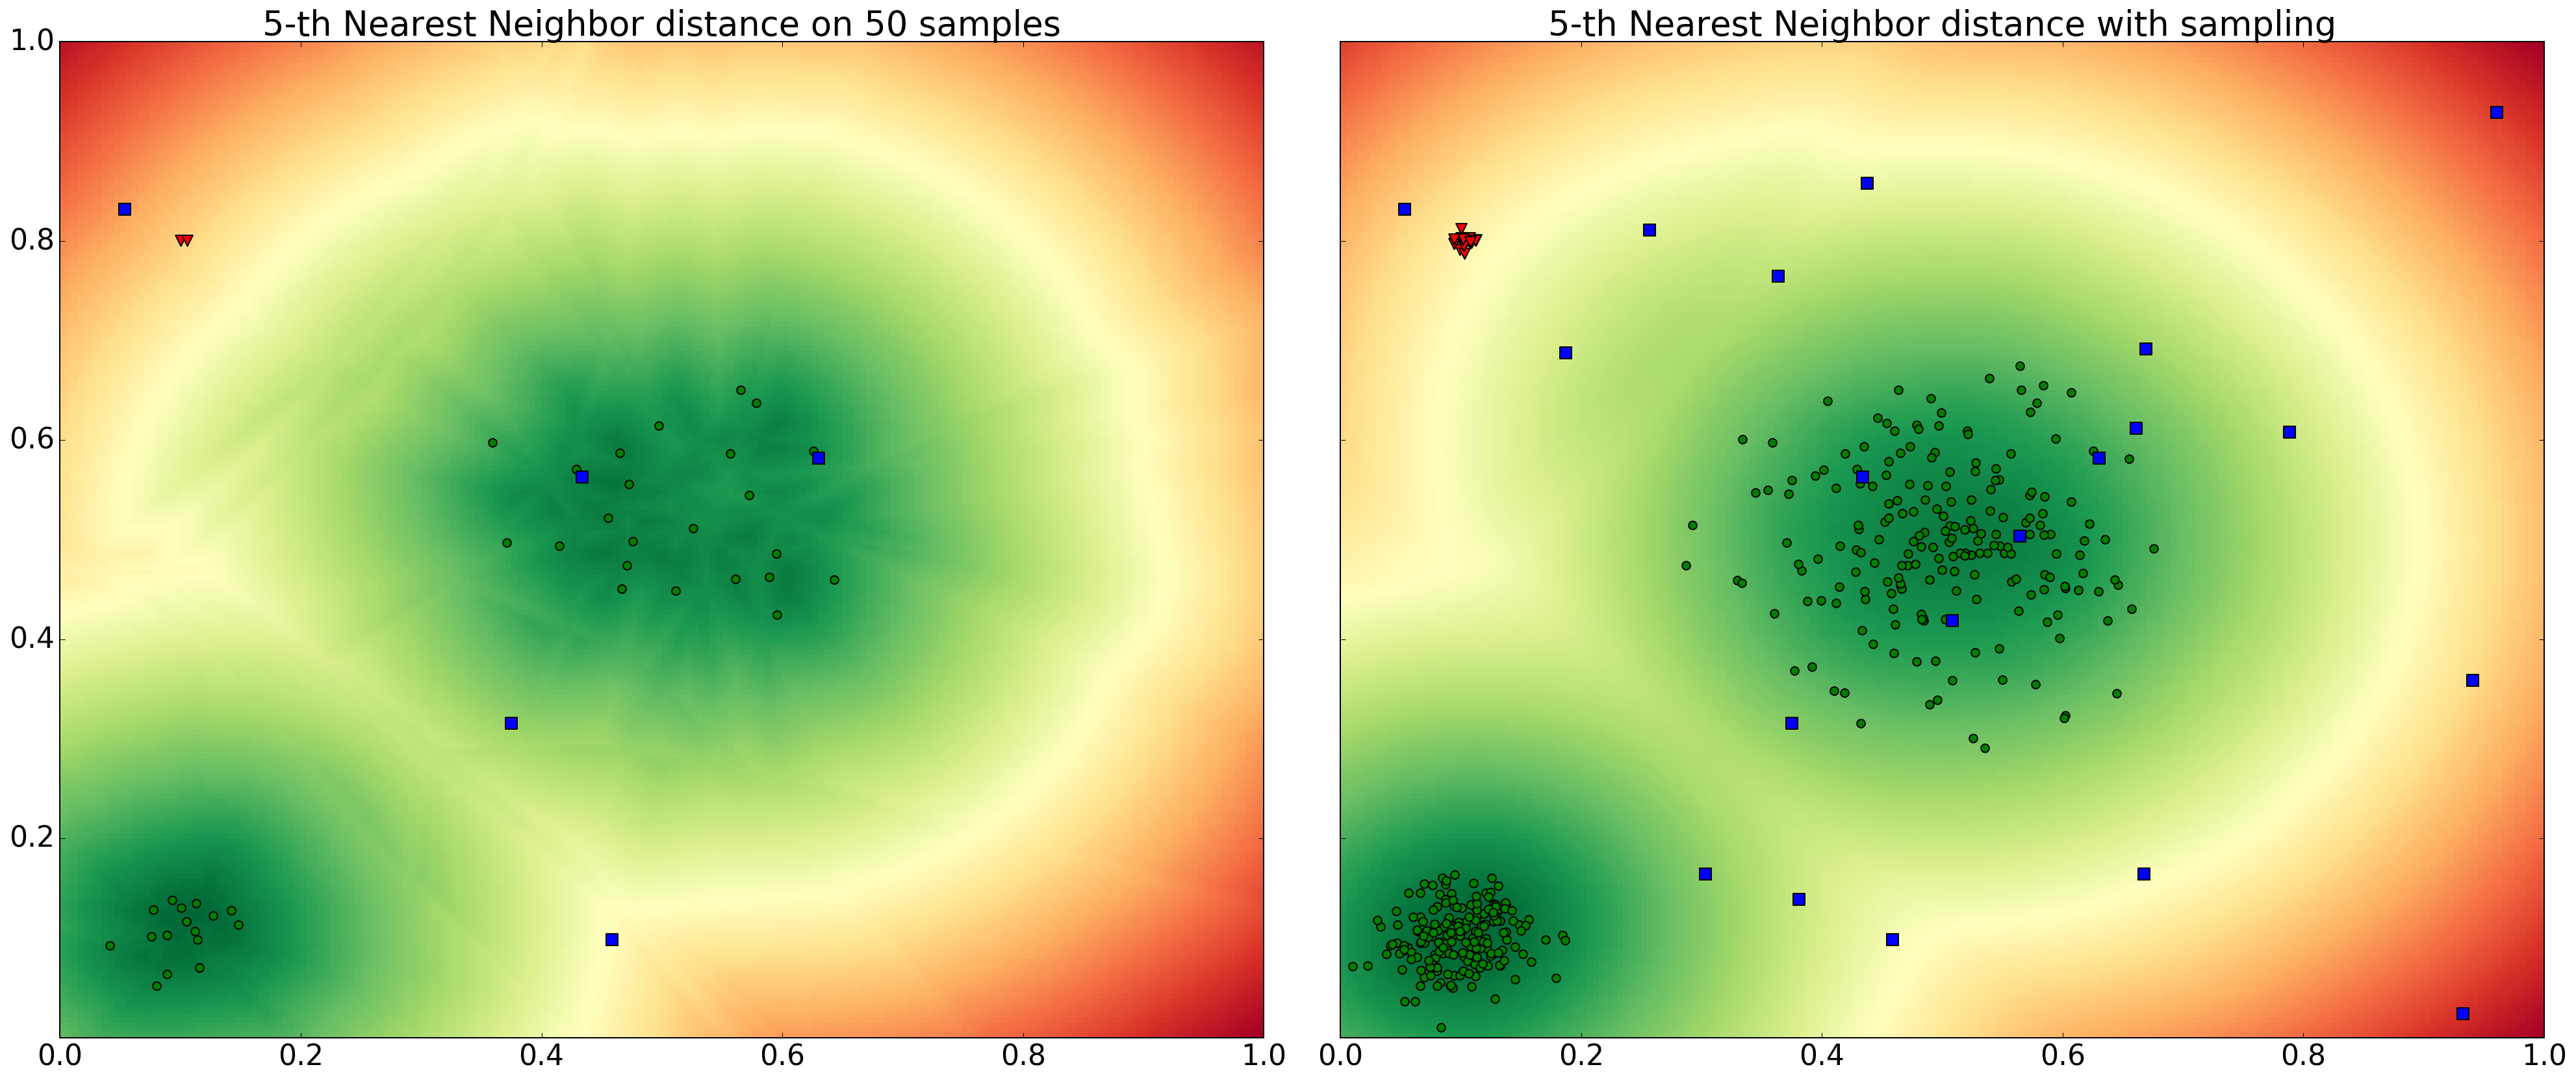

In [231]:
rcParams['figure.figsize'] = 28, 12

f, (plt1, plt2) = plt.subplots(1, 2, sharey=True)

indexes = np.random.choice(440, 50)
indexes = np.array([i in indexes for i in range(440)], dtype=bool)
def drawSubsample(ax, score, title):
    y, x = np.mgrid[slice(0, 1.001, 0.005),
                    slice(0, 1.001, 0.005)]
    z = score(np.array([x.flatten(), y.flatten()]).T).reshape(201, 201)
    
    ax.pcolor(x, y, z, cmap=plt.cm.RdYlGn)
    ax.scatter(DF[:400][indexes[:400]][:, 0], DF[:400][indexes[:400]][:, 1], c='g', s=40, label="normal data")
    ax.scatter(DF[400:420][indexes[400:420]][:, 0], DF[400:420][indexes[400:420]][:, 1], c='b', marker='s', s=80, label="noise")
    ax.scatter(DF[420:440][indexes[420:440]][:, 0], DF[420:440][indexes[420:440]][:, 1], c='r', marker='v', s=70, label="anomalies") 

    ax.set_xlim(0, 1)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_ylim(0, 1)
    ax.set_title(title)
    plt.tight_layout()

def a(X):
    DM = dist_matrix(X, DF[indexes])
    return -np.sort(DM, axis=1)[:, 4]
    
drawSubsample(plt1, a, "5-th Nearest Neighbor distance on 50 samples")

def a(X):
    ans = np.zeros((len(X)))
    for i in range(100):
        indexes = np.random.choice(len(DF), 50)
        DM = dist_matrix(X, DF[indexes])
        ans += -np.sort(DM, axis=1)[:, 4]
    return ans / 100
    
draw(plt2, a, "5-th Nearest Neighbor distance with sampling")

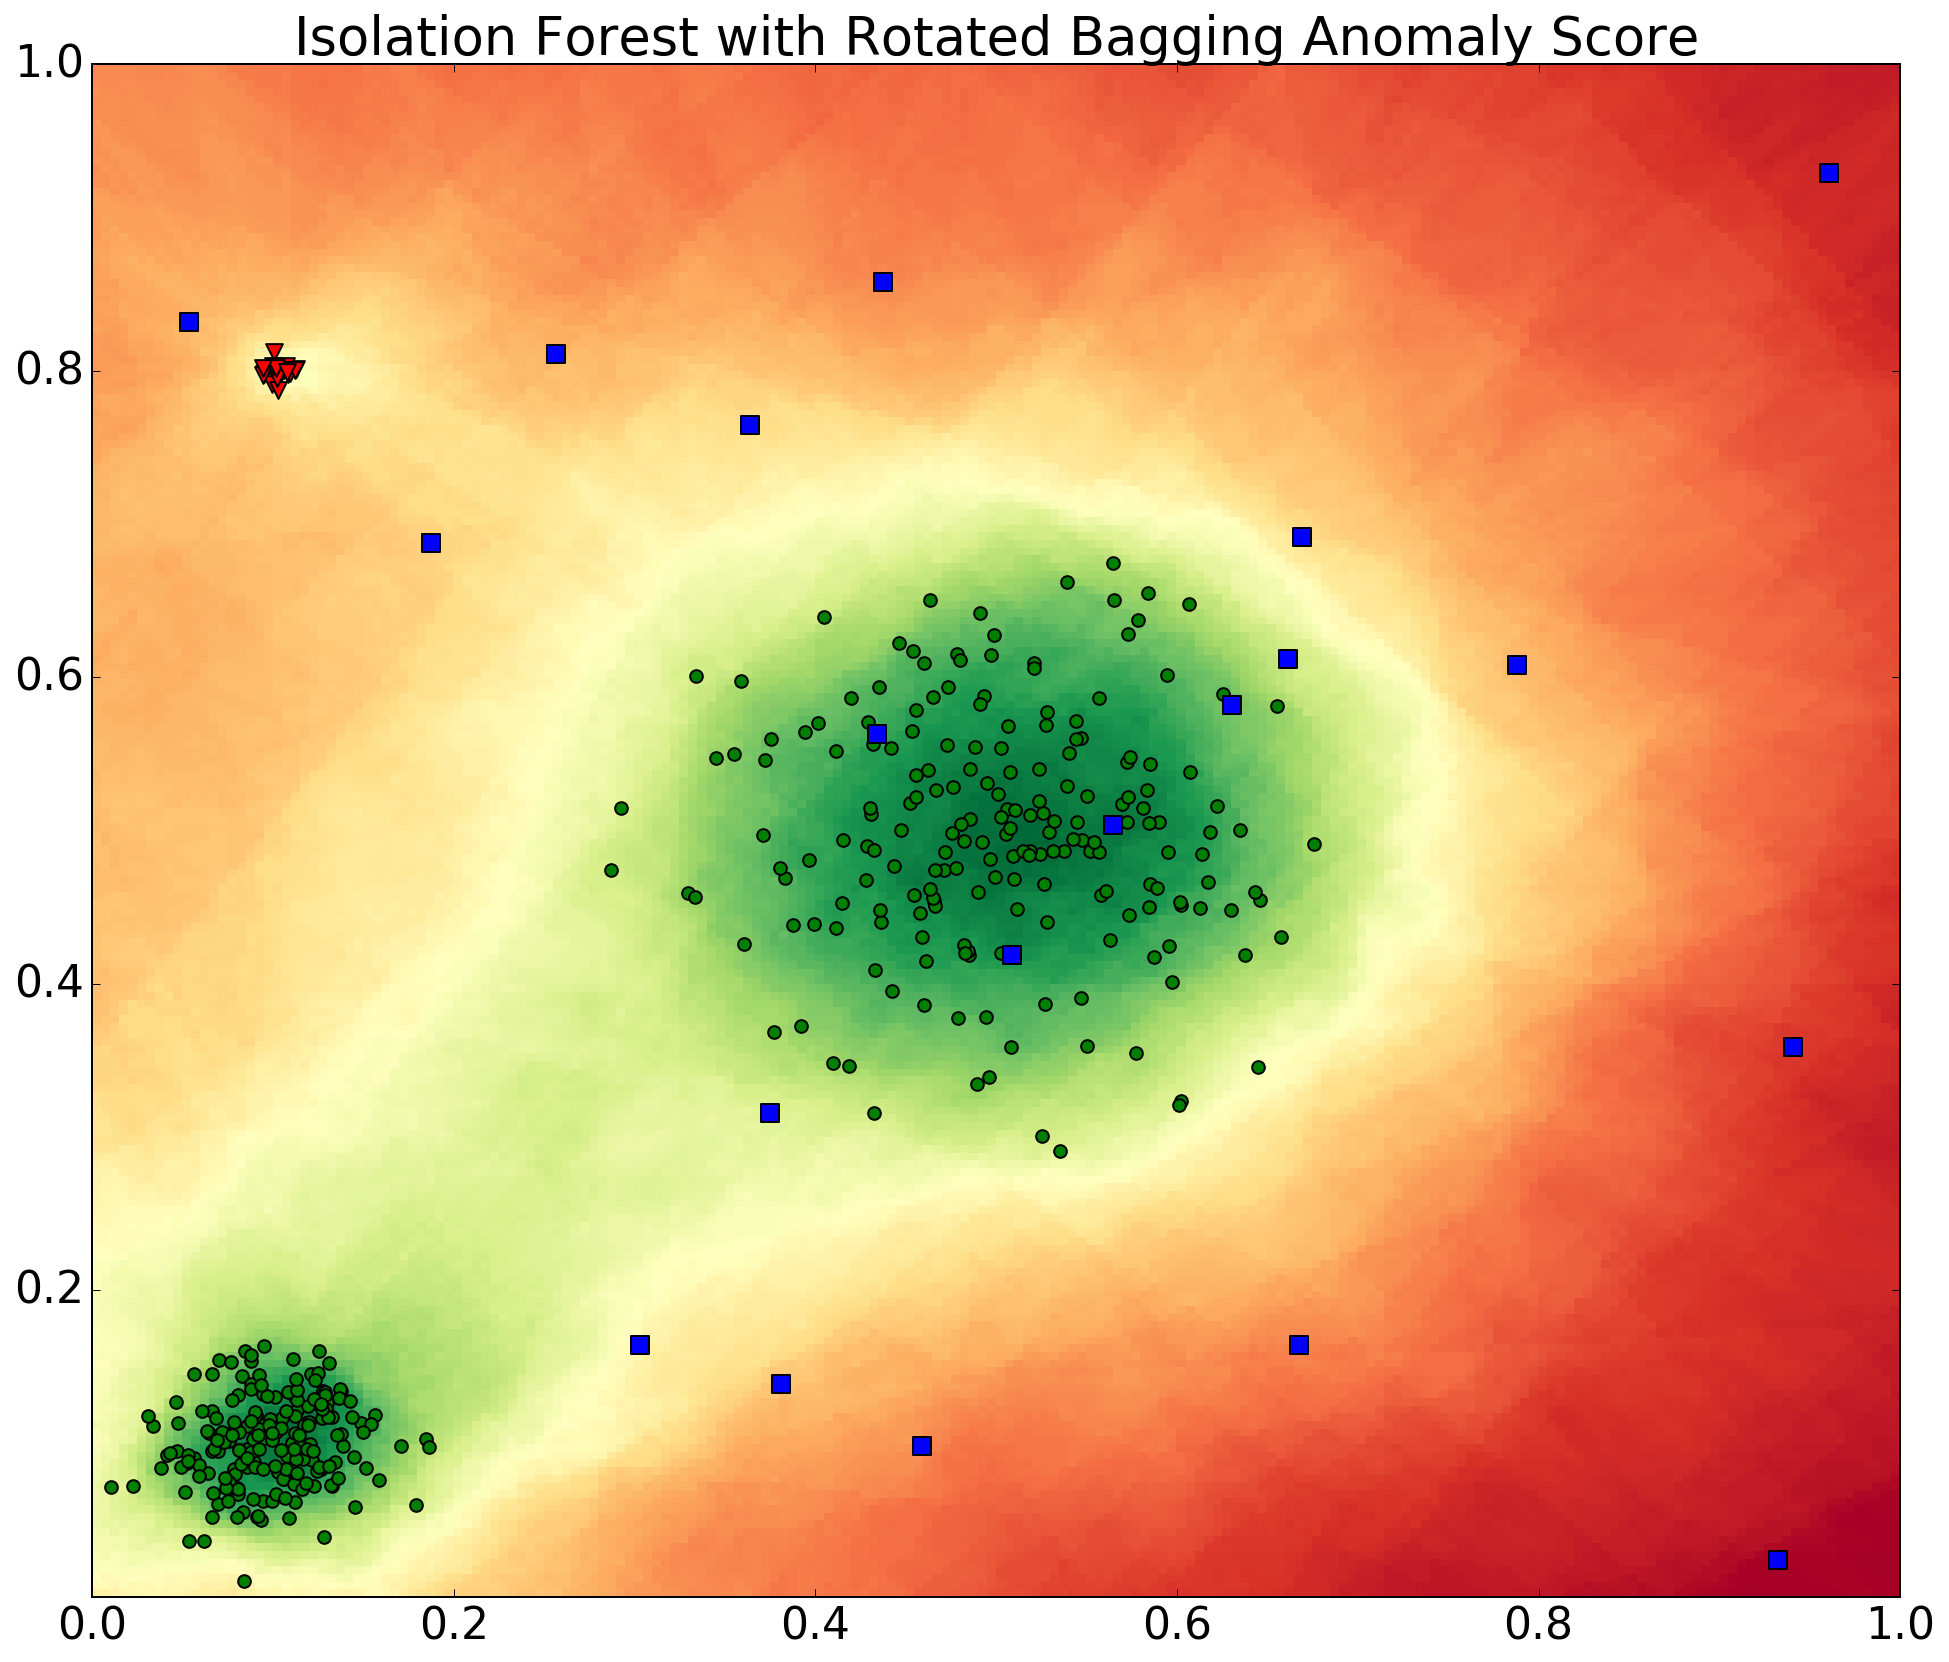

In [189]:
rcParams['figure.figsize'] = 14, 12
f, (plt1) = plt.subplots(1, 1)

draw(plt1, exp.Ensembler(exp.Rotated(IsolationForest(1))).fit(DF).decision_function, "Isolation Forest with Rotated Bagging Anomaly Score")

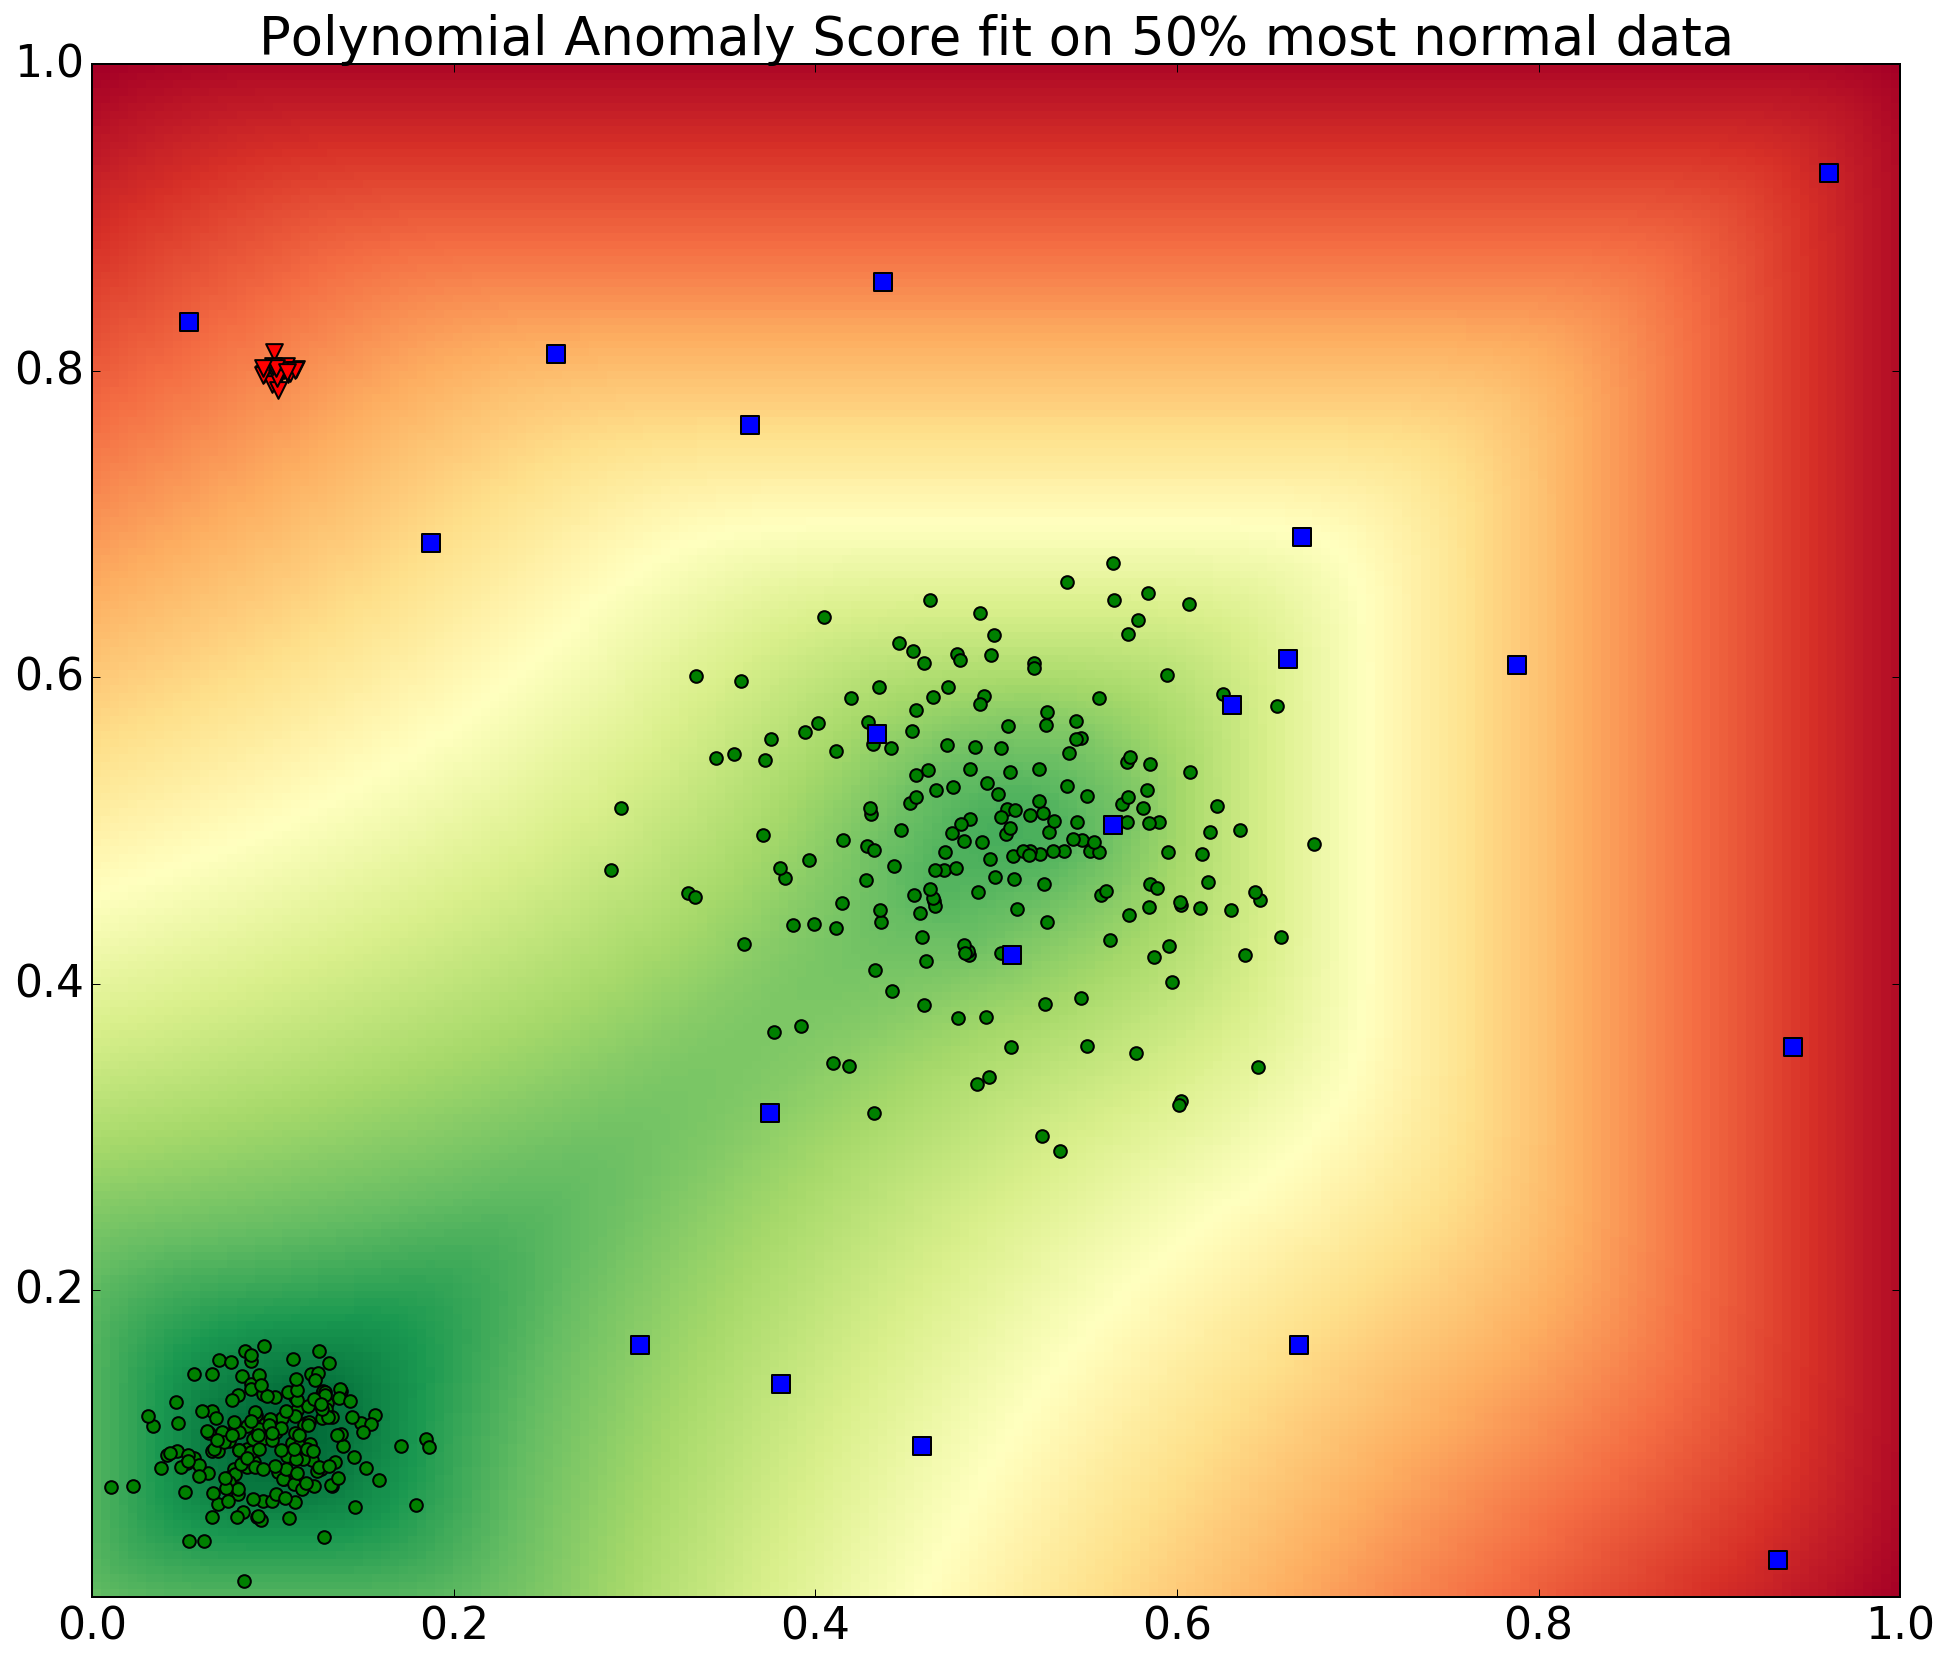

In [257]:
rcParams['figure.figsize'] = 14, 12
f, (plt1) = plt.subplots(1, 1)

pred = IsolationForest().fit(DF).decision_function(DF)
draw(plt1, exp.PolynomSolver().fit(DF[pred > np.percentile(pred, 50)]).decision_function, "Polynomial Anomaly Score fit on 50% most normal data")

In [445]:
rnd = np.random.RandomState(seed=179)
K = 0.1 * rnd.normal(size=(400, 1)) + 0.5
normals = np.hstack([K, K]) + 0.05 * rnd.normal(size=(400, 2))
noise = rnd.uniform(0, 1, size=(20, 2))
anomalies = 0.005 * rnd.normal(size=(20, 2)) + 0.1
anomalies[:, 1] += 0.7

DF = np.vstack([normals, noise, anomalies])
pd.DataFrame(DF).to_csv("linear_model_data.csv")

In [446]:
def drawWithWhites(ax, score, use, title):
    y, x = np.mgrid[slice(0, 1.001, 0.005),
                    slice(0, 1.001, 0.005)]
    z = score(np.array([x.flatten(), y.flatten()]).T).reshape(201, 201)
    
    ax.pcolor(x, y, z, cmap=plt.cm.RdYlGn)
    
    norm_use = use[:400]
    noise_use = use[400:420]
    anom_use = use[420:]
    
    ax.scatter(normals[norm_use][:, 0], normals[norm_use][:, 1], c='g', s=40, label="normal data")
    ax.scatter(normals[~norm_use][:, 0], normals[~norm_use][:, 1], c='w', s=40, label="not used")
    ax.scatter(noise[noise_use][:, 0], noise[noise_use][:, 1], c='b', marker='s', s=80, label="noise")
    ax.scatter(noise[~noise_use][:, 0], noise[~noise_use][:, 1], c='w', marker='s', s=80)
    ax.scatter(anomalies[anom_use][:, 0], anomalies[anom_use][:, 1], c='r', marker='v', s=70, label="anomalies") 
    ax.scatter(anomalies[~anom_use][:, 0], anomalies[~anom_use][:, 1], c='w', marker='v', s=70)

    ax.set_xlim(0, 1)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_ylim(0, 1)
    ax.set_title(title)
    plt.tight_layout()

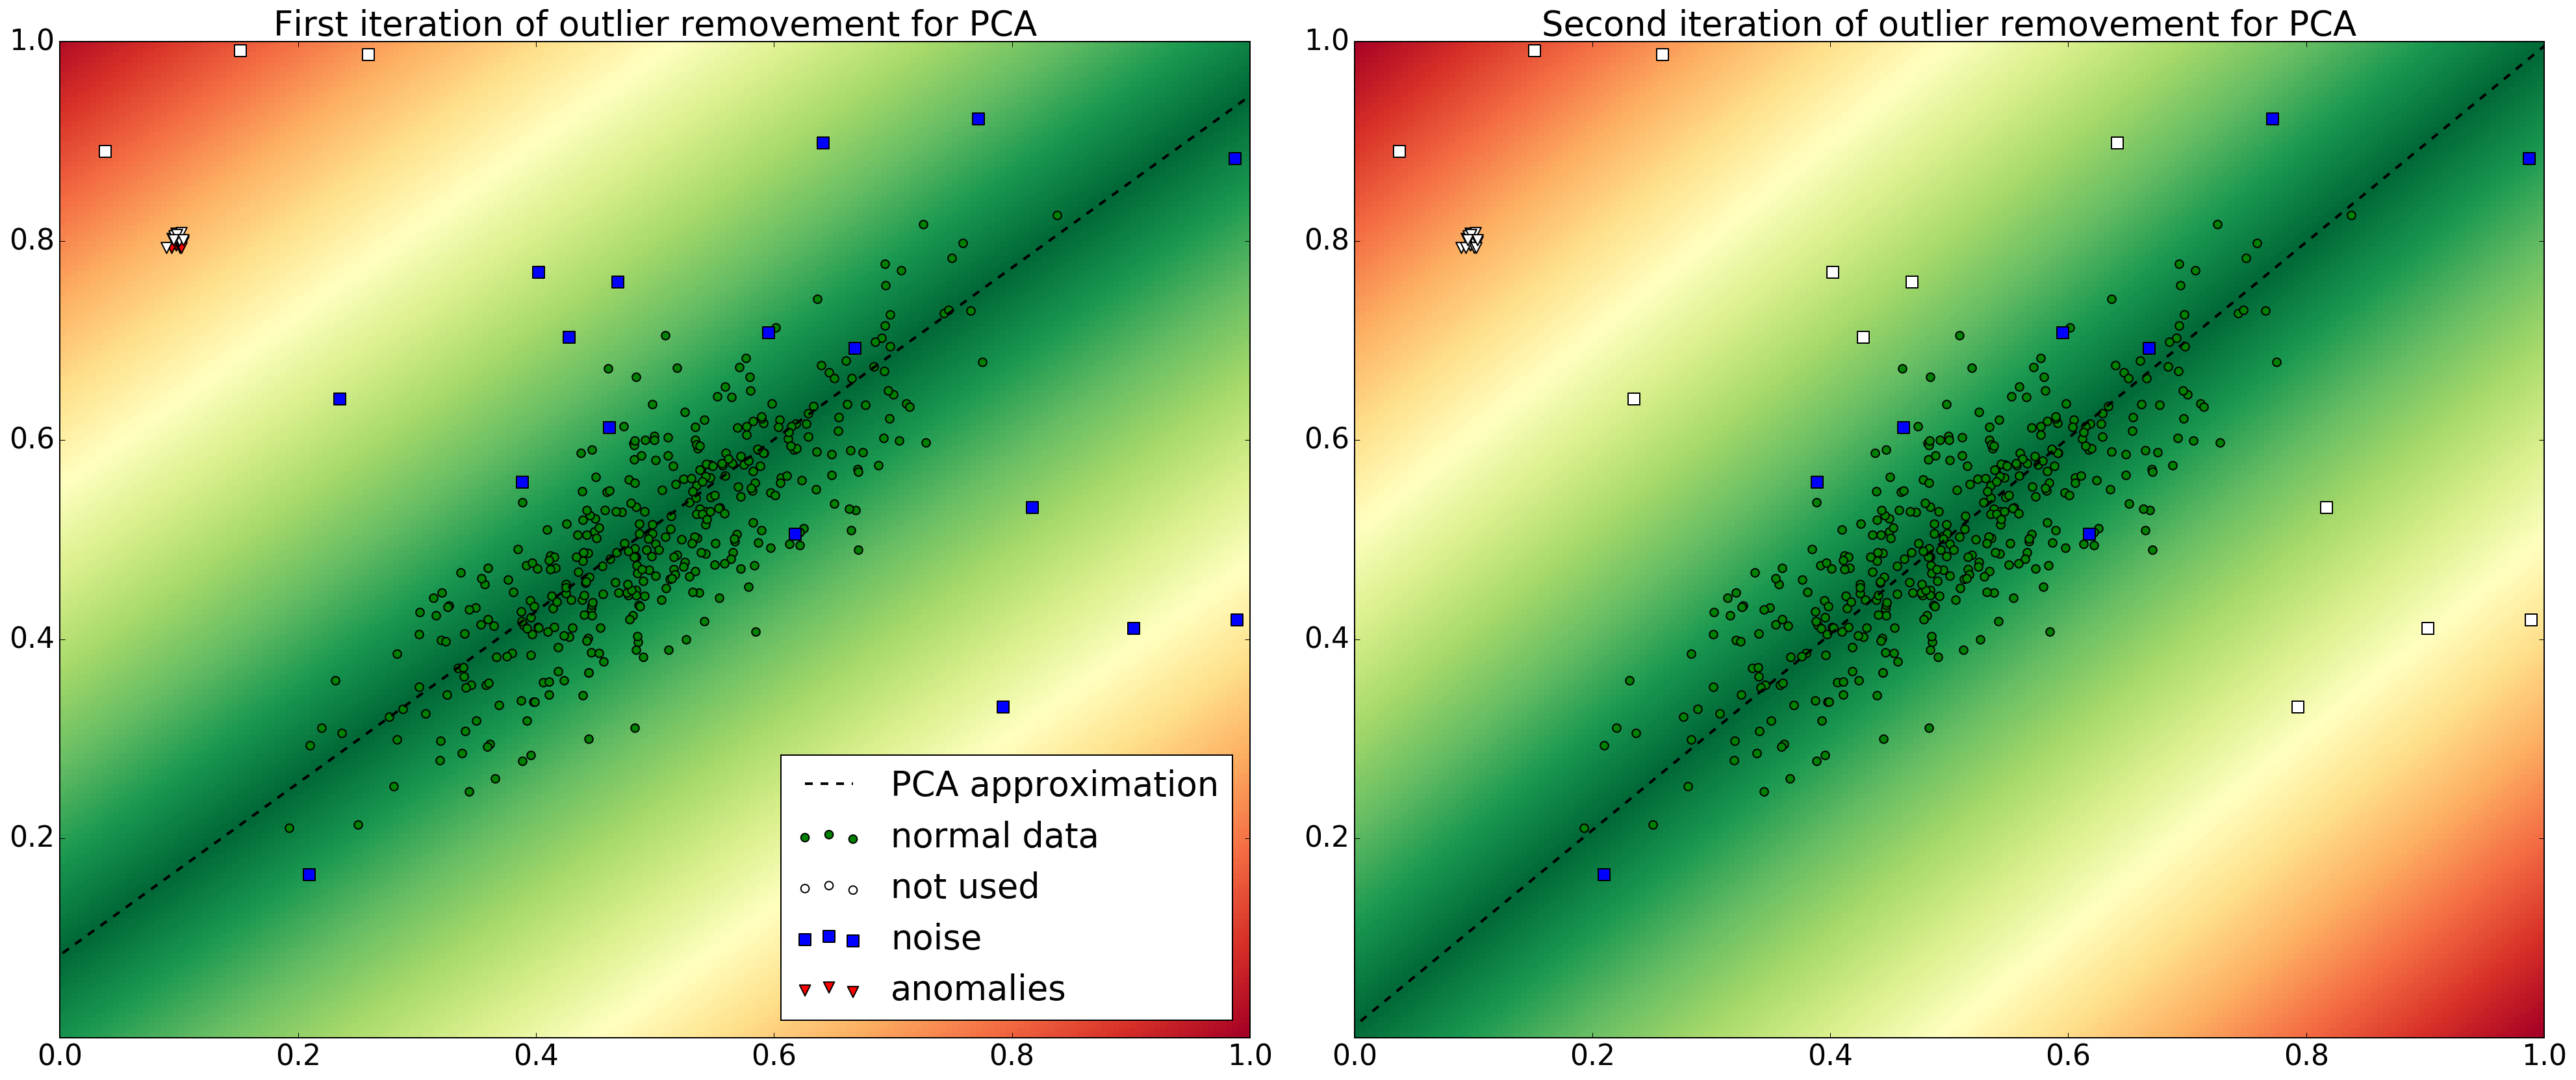

In [447]:
def a(X):
    return -((X - pca.inverse_transform(pca.transform(X)))**2).sum(axis=1)**0.5

rcParams['figure.figsize'] = 28, 12
f, (ax1, ax2) = plt.subplots(1, 2)
pca = PCA(n_components = 1).fit(DF)

pred = a(DF)
use = pred > sorted(pred)[15]

pca = PCA(n_components = 1).fit(DF[use])

point = pca.inverse_transform([0])
point1 = point - pca.components_[0]
point2 = point + pca.components_[0]
ax1.plot([point1[0], point2[0]], [point1[1], point2[1]], '--', color='black', lw=2, label="PCA approximation")

drawWithWhites(ax1, a, use, "First iteration of outlier removement for PCA")
ax1.legend(loc=4)

pred = a(DF)
use = use & (pred > sorted(a(DF)[use])[15])

pca = PCA(n_components = 1).fit(DF[use])

point = pca.inverse_transform([0])
point1 = point - pca.components_[0]
point2 = point + pca.components_[0]
ax2.plot([point1[0], point2[0]], [point1[1], point2[1]], '--', color='black', lw=2, label="PCA approximation")

drawWithWhites(ax2, a, use, "Second iteration of outlier removement for PCA")

# Важкий випадок

In [436]:
def draw(ax, score, title):
    y, x = np.mgrid[slice(-1.5, 1.501, 0.015),
                    slice(-1.5, 1.501, 0.015)]
    z = score(np.array([x.flatten(), y.flatten()]).T).reshape(201, 201)
    
    ax.pcolor(x, y, z, cmap=plt.cm.RdYlGn)
    ax.scatter(normals[:, 0], normals[:, 1], c='g', s=40, label="normal data")
    #ax.scatter(noise[:, 0], noise[:, 1], c='b', marker='s', s=80, label="noise")
    ax.scatter(anomalies[:, 0], anomalies[:, 1], c='r', marker='v', s=70, label="anomalies") 

    ax.set_xlim(-1.5, 1.5)
    ax.set_yticks([-1, -0.5, 0, 0.5, 1.0, 1.5])
    ax.set_ylim(-1.5, 1.5)
    ax.set_title(title)
    plt.tight_layout()

In [441]:
import math
rnd = np.random.RandomState(seed=179)
K = rnd.uniform(0, 2 * math.pi, size=(400, 1))
normals = np.hstack([np.cos(K), np.sin(K)]) + 0.1 * rnd.normal(size=(400, 2))
anomalies = 0.1 * rnd.normal(size=(20, 2))

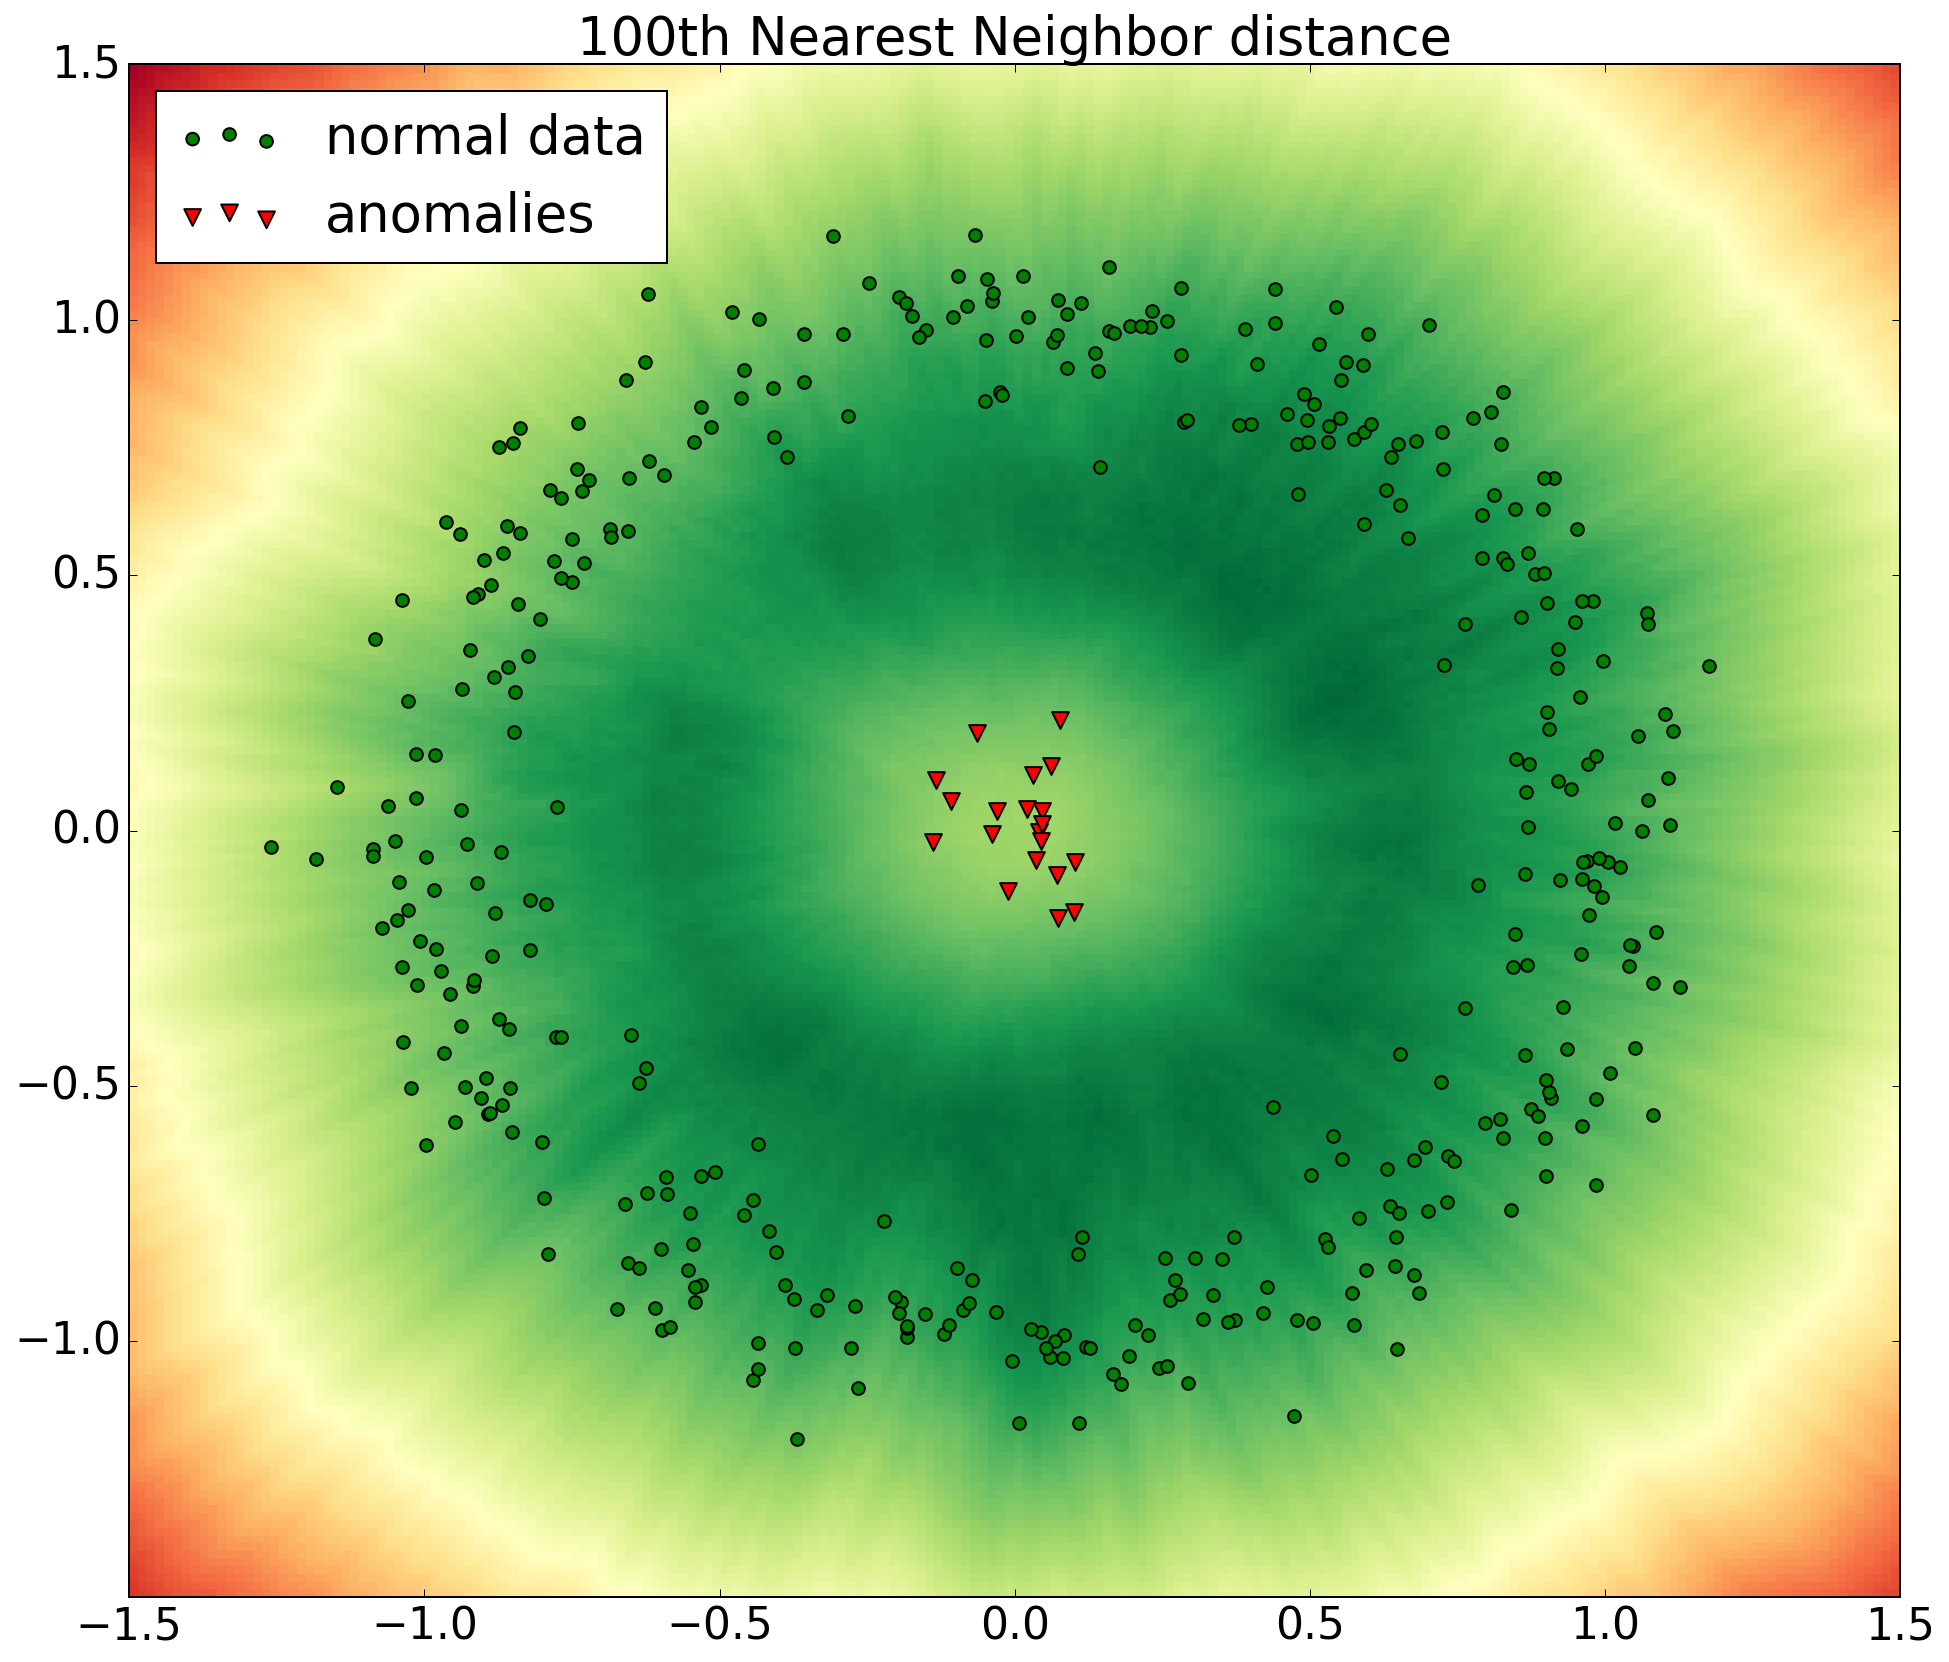

In [444]:
rcParams['figure.figsize'] = 14, 12
f, (ax1) = plt.subplots(1, 1)

def a(X):
    DM = dist_matrix(X, np.vstack([normals, anomalies]))
    return -np.sort(DM, axis=1)[:, 99]
    
draw(ax1, a, "100th Nearest Neighbor distance")
ax1.legend(loc=2)
plt.show()

# Генерація TeX-таблиць

In [370]:
pd.options.display.max_rows = 25

results = pd.read_csv("FINAL_RESULTS.csv", index_col = 0)
results

Ionosphere (train)  Ionosphere (test)  \
IsolationForest                     0.923169           0.812883   
IsolationForest RB                  0.929172           0.805792   
IsolationForest RB-RFW              0.932373           0.792432   
IsolationForest RB-RFW-S            0.937175           0.811390   
IsolationForest RB-S                0.926771           0.808031   
IsolationForest S                   0.927171           0.794298   
IterativeEnsemble                   0.915166           0.827064   
LOF                                 0.960384           0.874832   
LOF RB                              0.903962           0.810942   
LOF RB-RFW                          0.919168           0.825123   
LOF RB-RFW-S                        0.941176           0.848410   
LOF RB-S                            0.933573           0.839379   
LOF RFW                             0.959184           0.854605   
LOF RFW-S                           0.945578           0.886177   
LOF S                               0.943577           0.873339   
Polynom                             0.500000           0.827213   
Polynom RB                          0.500600           0.810270   
Polynom RB-RFW                      0.500600           0.807658   
Polynom RB-RFW-S                    0.890356           0.799373   
Polynom RB-S                        0.881553           0.812062   
Polynom RFW                         0.500000           0.817883   
Polynom RFW-S                       0.753101           0.811464   
Polynom S                           0.687875           0.826989   

                          Arrythmia (train)  Arrythmia (test)  \
IsolationForest                    0.779115          0.844961   
IsolationForest RB                 0.759569          0.786990   
IsolationForest RB-RFW             0.763641          0.780923   
IsolationForest RB-RFW-S           0.771423          0.815639   
IsolationForest RB-S               0.783459          0.789350   
IsolationForest S                  0.762646          0.859454   
IterativeEnsemble                  0.789340          0.843613   
LOF                                0.796218          0.823391   
LOF RB                             0.767623          0.772835   
LOF RB-RFW                         0.766085          0.775531   
LOF RB-RFW-S                       0.768256          0.778564   
LOF RB-S                           0.771514          0.777216   
LOF RFW                            0.795403          0.824065   
LOF RFW-S                          0.800290          0.825750   
LOF S                              0.801828          0.826761   
Polynom                            0.500000          0.843276   
Polynom RB                         0.997738          0.796427   
Polynom RB-RFW                     0.997828          0.796427   
Polynom RB-RFW-S                   0.992127          0.801146   
Polynom RB-S                       0.988236          0.797101   
Polynom RFW                        0.500000          0.844287   
Polynom RFW-S                      0.739300          0.844287   
Polynom S                          0.762555          0.843276   

                          Breastw (train)  Breastw (test)  Pima (train)  \
IsolationForest                  0.971459        0.994505      0.679373   
IsolationForest RB               0.945610        0.966422      0.677623   
IsolationForest RB-RFW           0.948792        0.971306      0.652825   
IsolationForest RB-RFW-S         0.942022        0.965812      0.663647   
IsolationForest RB-S             0.948457        0.967033      0.670715   
IsolationForest S                0.977978        0.995726      0.667268   
IterativeEnsemble                0.988230        0.987179      0.714593   
LOF                              0.383457        0.347985      0.617939   
LOF RB                           0.467129        0.423077      0.619021   
LOF RB-RFW                       0.368900        0.335775      0.625501   
LOF RB-RFW-S                   

In [371]:
names = ["Ionosphere", "Arrythmia", "Breastw", "Pima", "Sattelite", "Thyroid", "Shuttle", "Mnist", "ForestCover"]

In [372]:
table = results.copy()
def func(x):
    return round(x, 4)
table = table.apply(func)
table = table.fillna('-')
table

Ionosphere (train)  Ionosphere (test)  \
IsolationForest                       0.9232             0.8129   
IsolationForest RB                    0.9292             0.8058   
IsolationForest RB-RFW                0.9324             0.7924   
IsolationForest RB-RFW-S              0.9372             0.8114   
IsolationForest RB-S                  0.9268             0.8080   
IsolationForest S                     0.9272             0.7943   
IterativeEnsemble                     0.9152             0.8271   
LOF                                   0.9604             0.8748   
LOF RB                                0.9040             0.8109   
LOF RB-RFW                            0.9192             0.8251   
LOF RB-RFW-S                          0.9412             0.8484   
LOF RB-S                              0.9336             0.8394   
LOF RFW                               0.9592             0.8546   
LOF RFW-S                             0.9456             0.8862   
LOF S                                 0.9436             0.8733   
Polynom                               0.5000             0.8272   
Polynom RB                            0.5006             0.8103   
Polynom RB-RFW                        0.5006             0.8077   
Polynom RB-RFW-S                      0.8904             0.7994   
Polynom RB-S                          0.8816             0.8121   
Polynom RFW                           0.5000             0.8179   
Polynom RFW-S                         0.7531             0.8115   
Polynom S                             0.6879             0.8270   

                          Arrythmia (train)  Arrythmia (test)  \
IsolationForest                      0.7791            0.8450   
IsolationForest RB                   0.7596            0.7870   
IsolationForest RB-RFW               0.7636            0.7809   
IsolationForest RB-RFW-S             0.7714            0.8156   
IsolationForest RB-S                 0.7835            0.7893   
IsolationForest S                    0.7626            0.8595   
IterativeEnsemble                    0.7893            0.8436   
LOF                                  0.7962            0.8234   
LOF RB                               0.7676            0.7728   
LOF RB-RFW                           0.7661            0.7755   
LOF RB-RFW-S                         0.7683            0.7786   
LOF RB-S                             0.7715            0.7772   
LOF RFW                              0.7954            0.8241   
LOF RFW-S                            0.8003            0.8257   
LOF S                                0.8018            0.8268   
Polynom                              0.5000            0.8433   
Polynom RB                           0.9977            0.7964   
Polynom RB-RFW                       0.9978            0.7964   
Polynom RB-RFW-S                     0.9921            0.8011   
Polynom RB-S                         0.9882            0.7971   
Polynom RFW                          0.5000            0.8443   
Polynom RFW-S                        0.7393            0.8443   
Polynom S                            0.7626            0.8433   

                          Breastw (train)  Breastw (test)  Pima (train)  \
IsolationForest                    0.9715          0.9945        0.6794   
IsolationForest RB                 0.9456          0.9664        0.6776   
IsolationForest RB-RFW             0.9488          0.9713        0.6528   
IsolationForest RB-RFW-S           0.9420          0.9658        0.6636   
IsolationForest RB-S               0.9485          0.9670        0.6707   
IsolationForest S                  0.9780          0.9957        0.6673   
IterativeEnsemble                  0.9882          0.9872        0.7146   
LOF                                0.3835          0.3480        0.6179   
LOF RB                             0.4671          0.4231        0.6190   
LOF RB-RFW                         0.3689          0.3358        0.6255   
LOF RB-RFW-S                   

In [394]:
t = pd.DataFrame(index=table.columns)#table.ix[:, 1::2].T
t["IsolationForest"] = results.T[results.T.columns[0:6]].max(axis=1)
t["LOF"] = results.T[results.T.columns[7:15]].max(axis=1)
t["Polynom"] = results.T[results.T.columns[15:]].max(axis=1)
t["IterativeEnsemble"] = results.T[results.T.columns[6:7]].max(axis=1)

train = t[::2]
train.index = names
test = t[1::2]
test.index = names
t = pd.DataFrame(index=train.index)
t["i1"] = train["IsolationForest"]
t["i2"] = test["IsolationForest"]
t["i3"] = train["LOF"]
t["i4"] = test["LOF"]
t["i5"] = train["Polynom"]
t["i6"] = test["Polynom"]
t["i7"] = train["IterativeEnsemble"]
t["i8"] = test["IterativeEnsemble"]

t = t.apply(func)
t.to_csv("table.txt", sep='&', line_terminator='\\\\\n')
t

i1      i2      i3      i4      i5      i6      i7      i8
Ionosphere   0.9372  0.8129  0.9604  0.8862  0.8904  0.8272  0.9152  0.8271
Arrythmia    0.7835  0.8595  0.8018  0.8268  0.9978  0.8443  0.7893  0.8436
Breastw      0.9780  0.9957  0.5490  0.4676  0.9989  0.9872  0.9882  0.9872
Pima         0.6794  0.7416  0.6597  0.6919  0.6840  0.7404  0.7146  0.7719
Sattelite    0.7677  0.7638  0.7303  0.7207  0.6699  0.6578  0.6661  0.6452
Thyroid      0.8365  0.7633  0.8002  0.7181  0.7742  0.6856  0.7765  0.6724
Shuttle      0.9958  0.9950  0.9639  0.9664  0.9911  0.9908  0.9899  0.9894
Mnist        0.8483  0.8569  0.8776  0.8867  0.8647  0.8705  0.8441  0.8540
ForestCover  0.9404  0.9411  0.9760  0.9761  0.9598  0.9608  0.9419  0.9435